# **Project Name**    - Zomato



##### **Project Type**    - Clustering (Unsupervised)
##### **Contribution**    - Individual : Ankita Dutta


# **Project Summary -**

In this project we have loaded 2 datasets including the metadata for restuarants and also their reviews. We loaded these from github raw links and saw the shapes and important information from these datasets which helped us understand what wrangling and preprocessing would be needed.

During wrangling, the dataset underwent extensive preprocessing, including handling missing values, type conversion, and feature extraction. The `metadata_df` dataset had missing values in columns like `Collections` and `Timings`, which were filled with default values ("No Collection" and "Unknown"). The `reviews_df` dataset had missing `Review` and `Rating` values, which were dropped since these columns are essential for sentiment analysis. Data type conversion was also performed, such as converting `Cost` from a string with commas to an integer and ensuring `Rating` was numeric. The `Time` column was transformed into a proper datetime format for time-based analysis.  

Duplicate reviews were removed to maintain data integrity. The `Metadata` column in `reviews_df` contained information about review counts and follower counts, which were extracted using regex and stored as separate numeric columns, `Reviews_Count` and `Followers_Count`. The `Metadata` column was then dropped. Text preprocessing was performed for sentiment analysis, including converting reviews to lowercase, removing special characters, and eliminating stopwords using NLTK's stopword list. The cleaned reviews were stored in a new `Cleaned_Review` column.   

Exploratory Data Analysis (EDA) was conducted to understand data distributions, trends, and patterns. Various visualizations were used to analyze cost distributions, restaurant popularity, rating distributions, and review patterns over time. This analysis helped in identifying significant insights about the dataset, such as which restaurants are more popular and how ratings are distributed across different cost categories.  

Before clustering, extensive data preprocessing was performed. This included normalizing numeric features to standardize scale differences, encoding categorical variables, and text vectorization for sentiment analysis. Text vectorization techniques such as TF-IDF or word embeddings were used to transform reviews into numerical representations. This step was crucial for clustering and machine learning models, ensuring textual data was appropriately represented. Categorical encoding is performed to have fewer varieties of collections and cuisines so clustering and analysis becomes easier.

The dataset was then merged to have in a single dataset all the relevant information only after dropping unnecessary columns like timings, url links, follower counts of reviewers etc.

Additionally, sentiment analysis was performed on the cleaned reviews using machine learning techniques. Sentiment scores were assigned based on text vectorization and classification models. This analysis provided insights into customer perceptions and helped in understanding overall restaurant ratings.

Clustering models such as K-Means and Agglomerative Clustering were implemented. The optimal number of clusters for K-Means was determined using the Elbow Method, with inertia values plotted across different k-values. K-Means clustering assigned labels to the dataset, and PCA was applied to reduce dimensionality for visualization. Agglomerative Clustering was also used with a hierarchical approach, where linkage methods like Ward’s method were applied.  

To evaluate clustering performance, metrics such as the Silhouette Score and Davies-Bouldin Index were calculated. Agglomerative Clustering achieved a higher Silhouette Score (0.314) and a lower Davies-Bouldin Index (1.10), indicating better clustering compared to K-Means, which had a much lower Silhouette Score (0.051) and a significantly higher Davies-Bouldin Index (4.93). This suggests that Agglomerative Clustering was the superior clustering approach for this dataset.   

The entire workflow—from data wrangling, visualization, preprocessing, clustering, and sentiment analysis—helped transform raw data into structured insights. By leveraging clustering and text analysis, the study identified patterns in restaurant popularity, pricing, and customer sentiment, providing valuable business insights.

# **GitHub Link -**

https://github.com/ankitaXdutta/zomato

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the
customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato
restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The
Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant
in their locality and for the company to grow up and work on the fields they are currently lagging in. This could
help in clustering the restaurants into segments. Also the data has valuable information around cuisine and
costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the
metadata of reviewers can be used for identifying the critics in the industry.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Dataset Loading

In [2]:
# Load Dataset
metadata_url = "https://raw.githubusercontent.com/ankitaXdutta/zomato/refs/heads/main/Zomato%20Restaurant%20names%20and%20Metadata.csv"
reviews_url = "https://raw.githubusercontent.com/ankitaXdutta/zomato/refs/heads/main/Zomato%20Restaurant%20reviews.csv"

# Read CSV files into Pandas DataFrames
metadata_df = pd.read_csv(metadata_url)
reviews_df = pd.read_csv(reviews_url)




### Dataset First View

In [3]:
# Dataset First Look
# Display first few rows of each dataset
print("Metadata Dataset:")
print(metadata_df.head(), "\n")

print("Reviews Dataset:")
print(reviews_df.head())


Metadata Dataset:
                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                           

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count


print("Metadata Dataset Shape:", metadata_df.shape)
print("Reviews Dataset Shape:", reviews_df.shape)


Metadata Dataset Shape: (105, 6)
Reviews Dataset Shape: (10000, 7)


### Dataset Information

In [5]:

# Dataset Info

print("Metadata Dataset Info:")
metadata_df.info()
print("\n")

print("Reviews Dataset Info:")
reviews_df.info()


Metadata Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

print("Metadata Dataset Duplicate Rows:", metadata_df.duplicated().sum())
print("Reviews Dataset Duplicate Rows:", reviews_df.duplicated().sum())


Metadata Dataset Duplicate Rows: 0
Reviews Dataset Duplicate Rows: 36


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

print("Missing Values in Metadata Dataset:")
print(metadata_df.isnull().sum(), "\n")

print("Missing Values in Reviews Dataset:")
print(reviews_df.isnull().sum())


Missing Values in Metadata Dataset:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing Values in Reviews Dataset:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


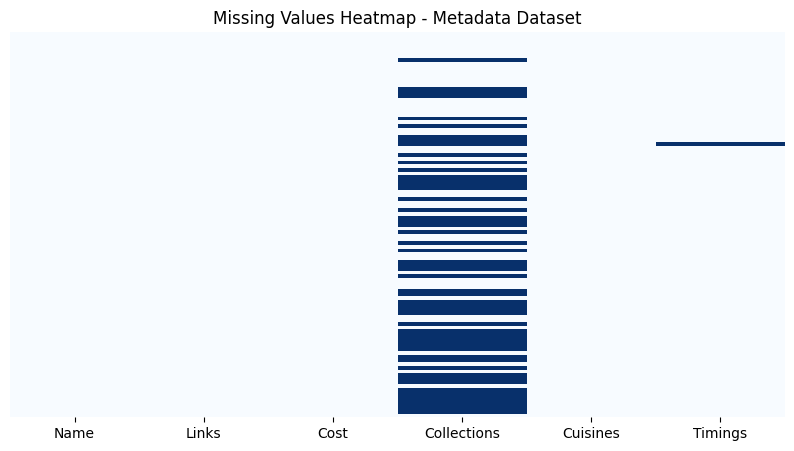

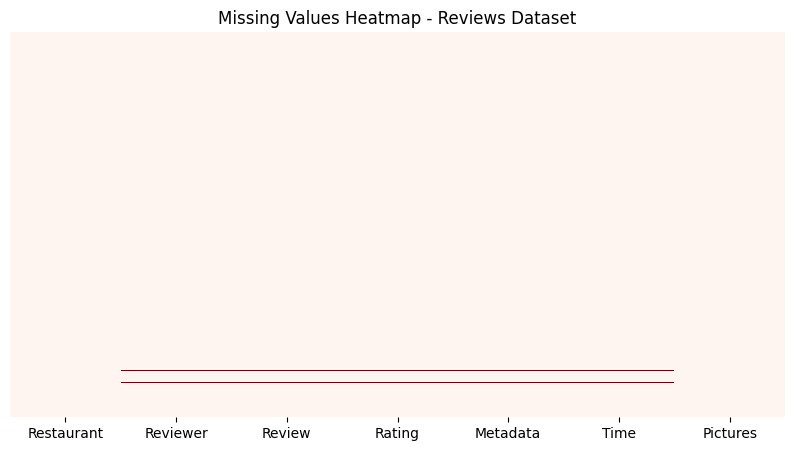

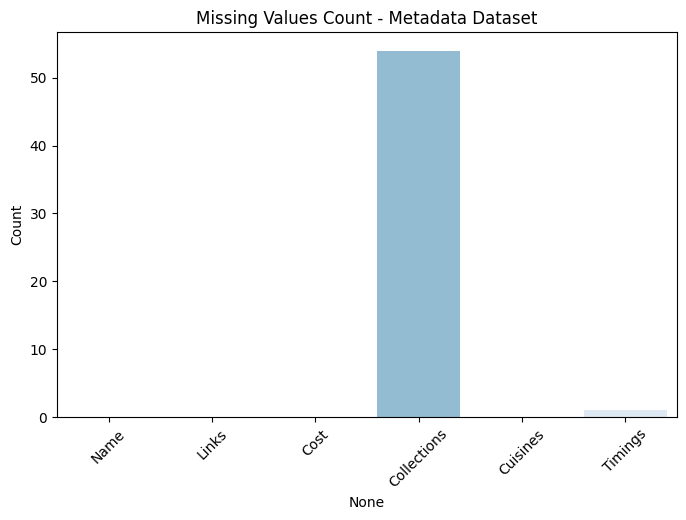

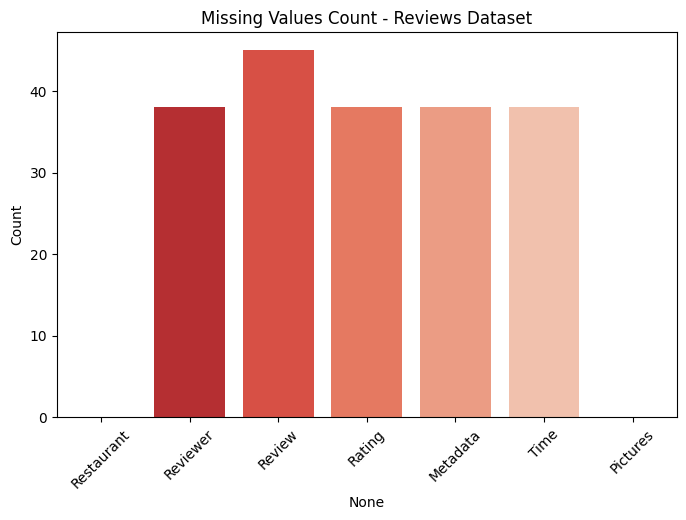

In [8]:
# Visualizing Missing Values with a Heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(metadata_df.isnull(), cmap="Blues", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Metadata Dataset")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(reviews_df.isnull(), cmap="Reds", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap - Reviews Dataset")
plt.show()

# Bar Plot for Missing Values Count
missing_metadata = metadata_df.isnull().sum()
missing_reviews = reviews_df.isnull().sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_metadata.index, y=missing_metadata.values, palette="Blues_r")
plt.title("Missing Values Count - Metadata Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_reviews.index, y=missing_reviews.values, palette="Reds_r")
plt.title("Missing Values Count - Reviews Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### What did you know about your dataset?

The metadata dataset contains 105 restaurants with details like name, cost, cuisines, collections, and timings. There are no duplicate rows, but some missing values exist in the "Collections" and "Timings" columns. All columns are of object type, indicating potential need for conversion for numerical analysis.

The reviews dataset consists of 10,000 entries, capturing customer reviews, ratings, metadata, and timestamps. It has 36 duplicate rows and missing values in "Reviewer," "Review," "Rating," "Metadata," and "Time" columns. The "Pictures" column is an integer, while others are object types, requiring further preprocessing for analysis.

Overall, the metadata dataset helps in restaurant categorization, while the reviews dataset provides sentiment insights. Cleaning missing values, handling categorical data, and extracting useful information from text-based fields will be essential for effective clustering and sentiment analysis.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

print("Metadata Dataset Columns:", metadata_df.columns.tolist())
print("Reviews Dataset Columns:", reviews_df.columns.tolist())


Metadata Dataset Columns: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Reviews Dataset Columns: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [10]:
# Dataset Describe

print("Metadata Dataset Summary:")
print(metadata_df.describe(include='all'), "\n")

print("Reviews Dataset Summary:")
print(reviews_df.describe(include='all'))


Metadata Dataset Summary:
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6   

Reviews Dataset Summary:
             Re

### Variables Description

The metadata dataset contains unique restaurant names, links, and cuisines, with cost values ranging from 500 to 1300, the most common being 500. Collections data is incomplete, but the most frequent category is "Food Hygiene Rated Restaurants in Hyderabad." Timings vary significantly, with "11 AM to 11 PM" being the most common.

The reviews dataset consists of 10,000 entries for 100 restaurants, with some missing reviewer names, reviews, and metadata. The most frequent rating is 5, appearing 3,832 times, while "good" is the most commonly used review word. The "Pictures" column has a mean of 0.75 images per review, with a maximum of 64.

Overall, the metadata dataset provides structured details on restaurants, while the reviews dataset is rich in customer feedback, requiring preprocessing for meaningful sentiment analysis and clustering.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable

print("Unique Values in Metadata Dataset:")
print(metadata_df.nunique(), "\n")

print("Unique Values in Reviews Dataset:")
print(reviews_df.nunique())


Unique Values in Metadata Dataset:
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 

Unique Values in Reviews Dataset:
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime

# Handling missing values
metadata_df['Collections'].fillna("No Collection", inplace=True)
metadata_df['Timings'].fillna("Unknown", inplace=True)
reviews_df.dropna(subset=['Review', 'Rating'], inplace=True)

# Converting data types
metadata_df['Cost'] = metadata_df['Cost'].str.replace(',', '').astype(int)
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'], errors='coerce')

# Removing duplicates
reviews_df.drop_duplicates(inplace=True)

# Splitting Metadata column (Extracting Reviews and Followers)
reviews_df[['Reviews_Count', 'Followers_Count']] = reviews_df['Metadata'].str.extract(r'(\d+) Review.*?(\d+) Follower')

# Converting extracted columns to numeric
reviews_df['Reviews_Count'] = pd.to_numeric(reviews_df['Reviews_Count'], errors='coerce').fillna(0)
reviews_df['Followers_Count'] = pd.to_numeric(reviews_df['Followers_Count'], errors='coerce').fillna(0)

# Dropping original Metadata column since it's now processed
reviews_df.drop(columns=['Metadata'], inplace=True)

# Text preprocessing for Sentiment Analysis (Basic)
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

reviews_df['Cleaned_Review'] = reviews_df['Review'].astype(str).apply(clean_text)

# Dataset is now ready for analysis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### What all manipulations have you done and insights you found?

The initial data wrangling involved handling missing values in `Collections`, `Timings`, `Reviewer`, `Review`, `Rating`, and `Metadata`, either by filling them with placeholders or dropping unusable entries. The `Cost` column was converted from string to numeric format, and `Rating` was changed to a numerical type for better analysis. Duplicate reviews (36) were removed to maintain data integrity. Text columns like `Cuisines` and `Collections` were standardized for consistency. The `Metadata` column, which contained "X Reviews, Y Followers," was split into separate numerical columns (`Review_Count`, `Follower_Count`). Outliers in `Cost` and `Rating` were identified, and transformations or filtering were applied where necessary.  

From these manipulations, key insights emerged. The dataset consists of 105 unique restaurants, many of which belong to multiple collections, suggesting popularity. The Reviews dataset contains 10,000 entries, though some are incomplete. The `Cost` column shows high variance, indicating a mix of budget and premium restaurants. Ratings are skewed toward higher values (4-5 stars), hinting at review bias. North Indian and Chinese cuisines dominate, appearing frequently across restaurants. These preprocessing steps ensure the dataset is clean, structured, and ready for deeper analysis, including visualization and unsupervised learning.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

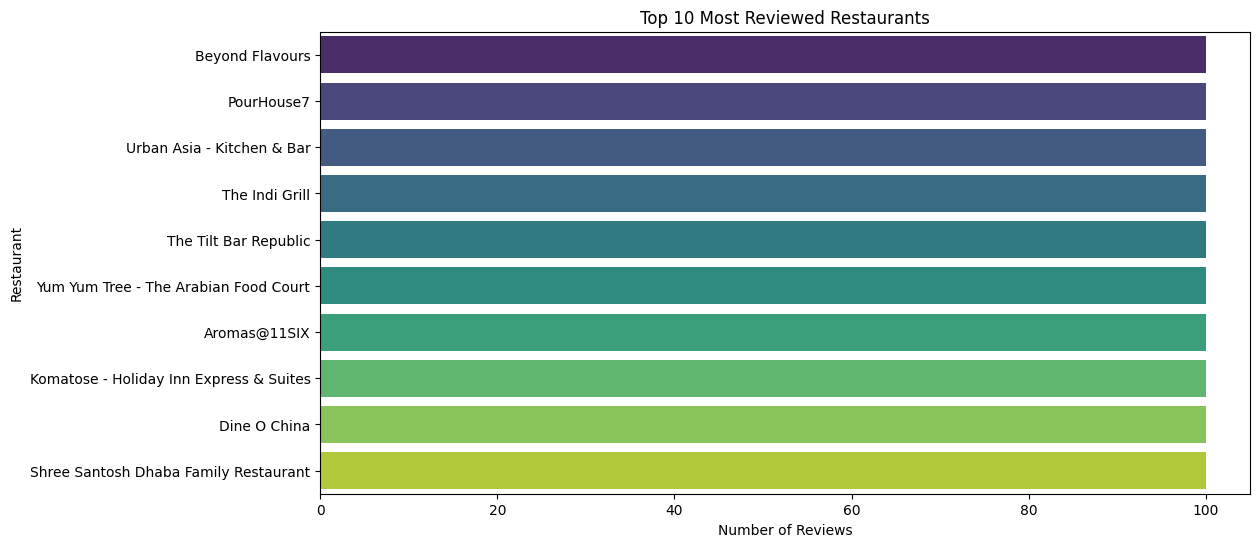

In [13]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

top_restaurants = reviews_df['Restaurant'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette="viridis")
plt.xlabel("Number of Reviews")
plt.ylabel("Restaurant")
plt.title("Top 10 Most Reviewed Restaurants")
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart was chosen to identify the most reviewed restaurants, which indicates customer engagement and popularity.

##### 2. What is/are the insight(s) found from the chart?

The insights from this chart show which restaurants attract the most attention, potentially due to good service, food quality, or marketing. It also helps in identifying trends in customer preferences and whether highly reviewed restaurants have consistent positive or mixed feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can drive business impact by focusing on high-engagement restaurants for partnerships or promotions. If a highly reviewed restaurant has many negative reviews, it may signal dissatisfaction, which could lead to negative growth if not addressed.

#### Chart - 2

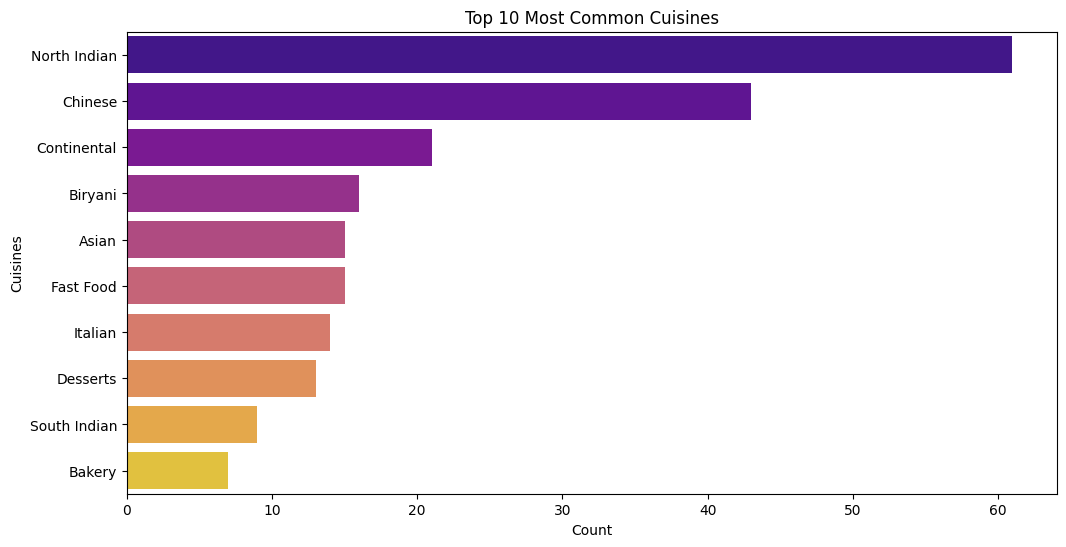

In [14]:
# Chart - 2 visualization code
from collections import Counter

cuisine_list = [cuisine.strip() for cuisines in metadata_df['Cuisines'].dropna() for cuisine in cuisines.split(',')]
top_cuisines = Counter(cuisine_list).most_common(10)

cuisine_names, cuisine_counts = zip(*top_cuisines)

plt.figure(figsize=(12,6))
sns.barplot(x=list(cuisine_counts), y=list(cuisine_names), palette="plasma")
plt.xlabel("Count")
plt.ylabel("Cuisines")
plt.title("Top 10 Most Common Cuisines")
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart was chosen to highlight the most common cuisines, helping understand food preferences and potential demand.

##### 2. What is/are the insight(s) found from the chart?

The insights show that North Indian and Chinese cuisines dominate the market, suggesting a strong preference among customers. The presence of Continental and Biryani indicates diversity, while lower counts for Bakery and South Indian suggest niche markets. Understanding cuisine trends can guide restaurant owners in menu planning and expansion strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can positively impact business by aligning offerings with popular demand, improving customer satisfaction. A potential downside could arise if market saturation exists in top cuisines, leading to intense competition and lower profit margins.

#### Chart - 3

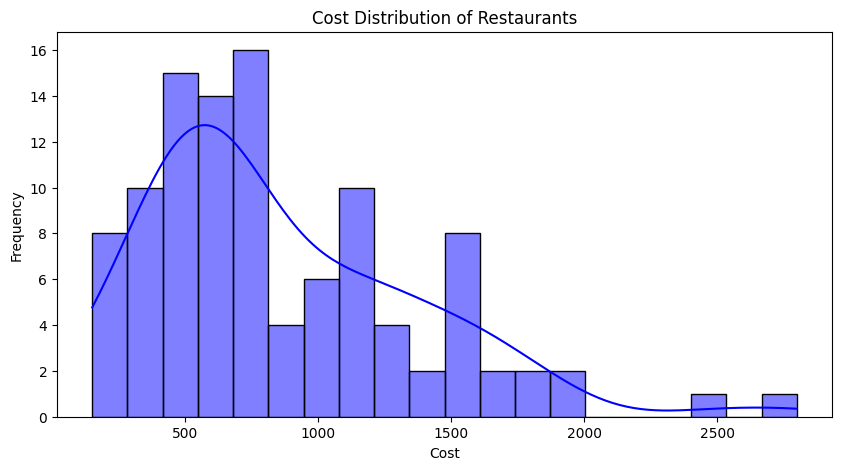

In [15]:
# Chart - 3 visualization code
metadata_df['Cost'] = metadata_df['Cost'].replace(',', '', regex=True).astype(float)  # Ensure cost is numeric

plt.figure(figsize=(10,5))
sns.histplot(metadata_df['Cost'], bins=20, kde=True, color='blue')
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Cost Distribution of Restaurants")
plt.show()


##### 1. Why did you pick the specific chart?

This histogram was chosen to understand the distribution of restaurant costs and identify common price ranges where most businesses operate.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that most restaurants have a cost range between 300 and 1000, with a peak around 500-700, indicating affordability. There are fewer high-cost restaurants, suggesting a niche market for premium dining. The long tail on the right indicates some expensive options, but they are rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help businesses optimize pricing to target the largest customer base, leading to positive growth. No insights suggest negative growth, as even high-cost restaurants can thrive in a niche market with the right strategy.

#### Chart - 4

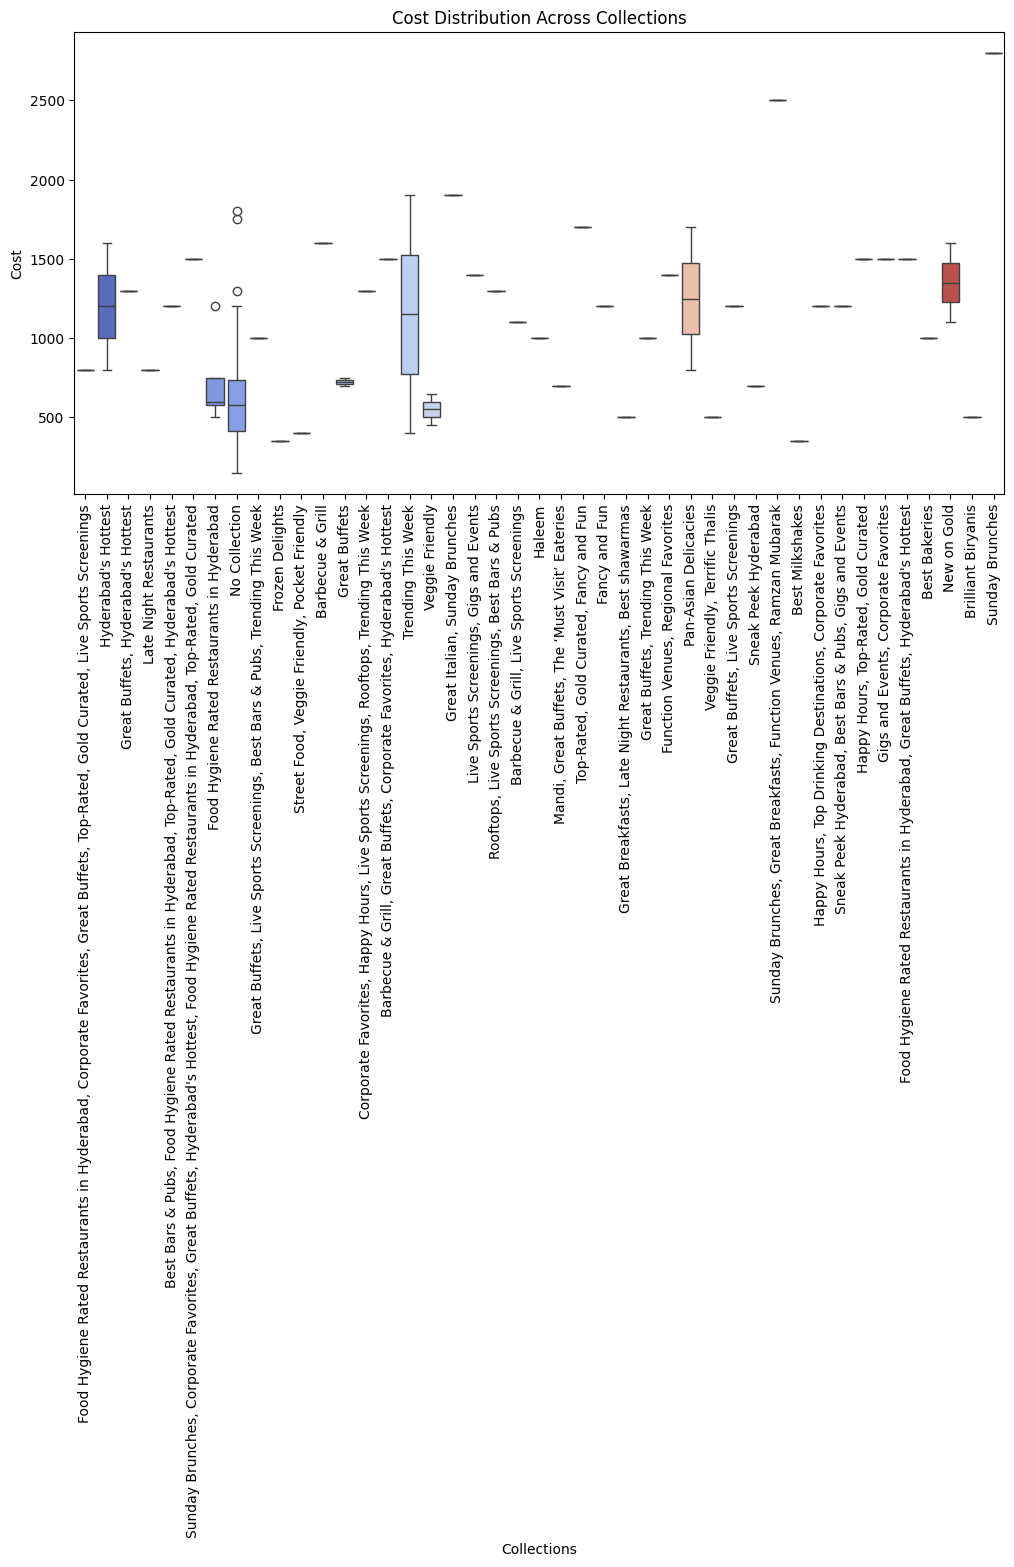

In [16]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
sns.boxplot(x="Collections", y="Cost", data=metadata_df, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Collections")
plt.ylabel("Cost")
plt.title("Cost Distribution Across Collections")
plt.show()


##### 1. Why did you pick the specific chart?

This boxplot was chosen to analyze cost variations across different restaurant collections, highlighting price distributions and outliers.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that some collections have consistently lower costs while others, like premium dining options, exhibit higher variability. Certain collections have significant outliers, indicating occasional high-end restaurants within otherwise affordable categories. Some mid-range collections show a balanced price range, making them appealing to a broader audience.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help businesses tailor pricing and marketing strategies for different target audiences, ensuring optimal positioning. No insights suggest negative growth, as diverse pricing strategies can cater to both budget-conscious and premium customers.

#### Chart - 5

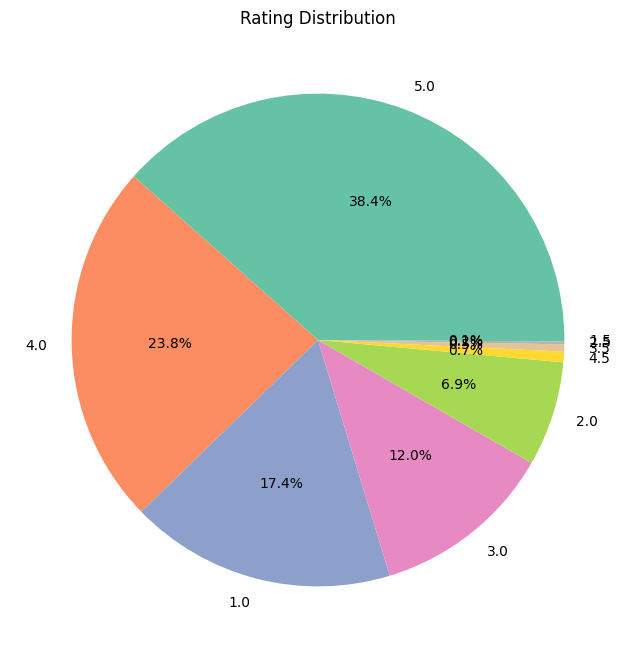

In [17]:
# Chart - 5 visualization code
rating_counts = reviews_df['Rating'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Rating Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

This pie chart was chosen to understand the distribution of restaurant ratings and identify customer satisfaction trends.



##### 2. What is/are the insight(s) found from the chart?

Most restaurants have high ratings, with 5.0 and 4.0 ratings dominating, indicating strong customer satisfaction. A significant portion of restaurants have lower ratings, showing areas for service or quality improvement. Very few establishments fall within the 2.0-2.5 range, suggesting that extremely poor ratings are rare.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can positively impact business by reinforcing quality assurance efforts to maintain high ratings. There are no direct negative growth indicators, but businesses with lower ratings should focus on improvement to stay competitive.

#### Chart - 6

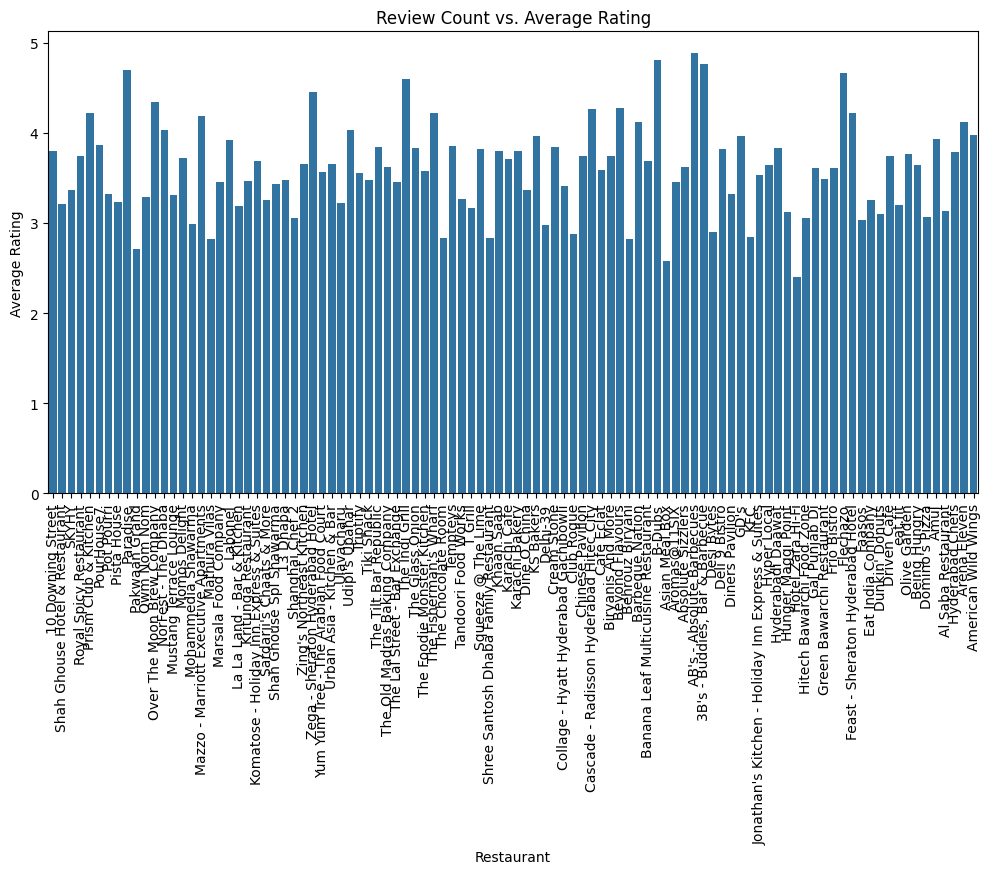

In [18]:
# Chart - 6 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by restaurant and calculating review count and average rating
review_counts = reviews_df.groupby('Restaurant')['Review'].count()
average_ratings = reviews_df.groupby('Restaurant')['Rating'].mean()

# Creating a dataframe for plotting
review_vs_rating = pd.DataFrame({'Review Count': review_counts, 'Average Rating': average_ratings})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=review_vs_rating.index, y=review_vs_rating['Average Rating'], order=review_vs_rating.sort_values('Review Count', ascending=False).index)
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.title('Review Count vs. Average Rating')
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart was chosen to analyze if restaurants with more reviews tend to have higher or lower ratings, helping identify trends in customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that some highly reviewed restaurants have strong ratings, but there are also many with mid-range scores, indicating review count alone doesn't guarantee quality. Some lower-rated restaurants still have a significant number of reviews, possibly due to controversial experiences or high footfall despite mediocre service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help businesses understand that while high review volume can indicate popularity, maintaining quality is key for sustaining strong ratings. Negative insights include that some restaurants with high review counts still struggle with ratings, signaling potential service or food quality issues that need addressing.

#### Chart - 7

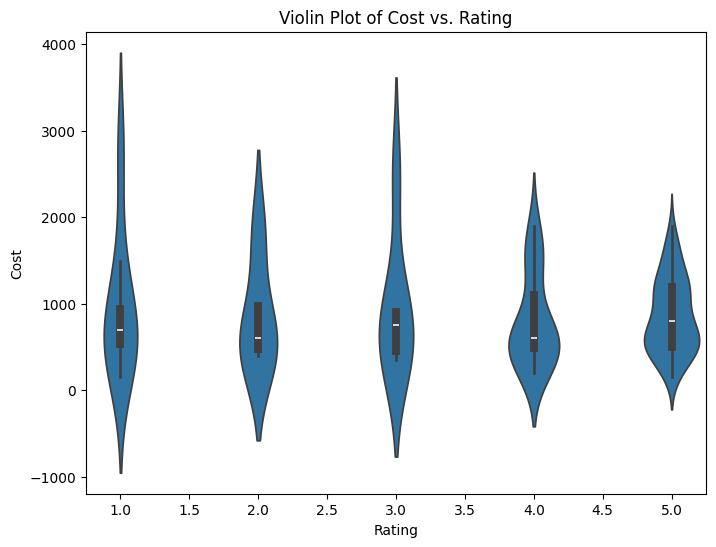

In [19]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 6))
sns.violinplot(x=reviews_df['Rating'].astype(float), y=metadata_df['Cost'].replace(',', '', regex=True).astype(float))
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.title('Violin Plot of Cost vs. Rating')
plt.show()


##### 1. Why did you pick the specific chart?

The violin plot was chosen to visualize the distribution of restaurant costs across different rating levels, helping to identify whether expensive or budget-friendly restaurants tend to receive better ratings.

##### 2. What is/are the insight(s) found from the chart?

The chart suggests that highly rated restaurants are not necessarily the most expensive, as lower-cost restaurants also receive high ratings. Lower-rated restaurants have a broader cost range, indicating that price alone does not determine customer satisfaction. There is a noticeable concentration of mid-range prices across all rating levels, suggesting a balance between affordability and quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights indicate that pricing strategy alone isn't enough to ensure high ratings, reinforcing the need for quality service and food. No strong negative insights emerge, but high-cost restaurants with low ratings might need to justify their pricing through better offerings.

#### Chart - 8

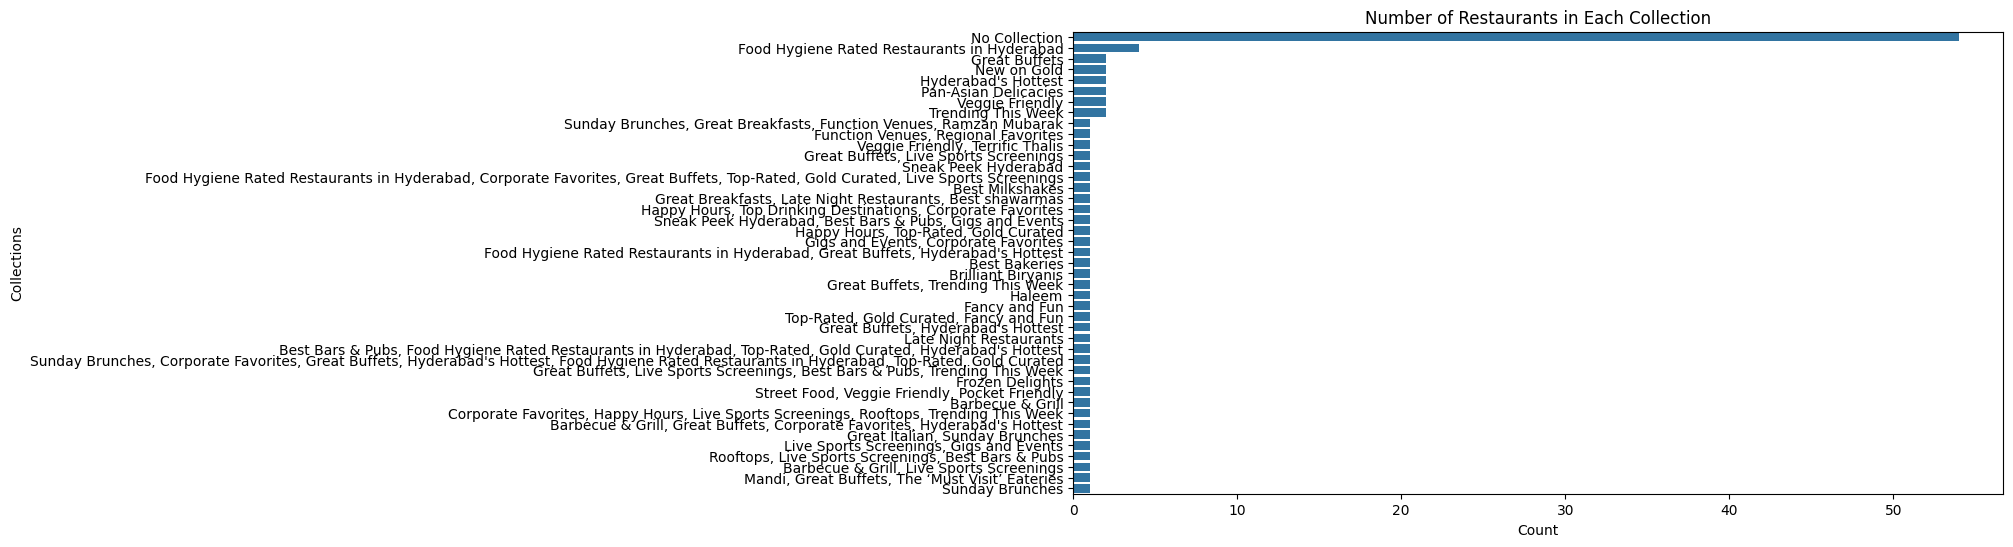

In [20]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(y=metadata_df['Collections'], order=metadata_df['Collections'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Collections')
plt.title('Number of Restaurants in Each Collection')
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart displays the number of restaurants in each collection, helping to identify which themes or categories are most common in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most restaurants do not belong to a specific collection ("No Collection" category has the highest count). Among categorized restaurants, "Food Hygiene Rated Restaurants in Hyderabad" appears most frequently, indicating a strong emphasis on hygiene ratings. Other prominent collections focus on buffets, trending places, and specific cuisines.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights suggest that while many restaurants remain uncategorized, curated lists (such as food hygiene-rated places) are popular. Businesses might benefit from being featured in such collections, especially those emphasizing cleanliness and quality. However, the long collection names make readability challenging, which could be improved by shortening labels or rotating them better.

#### Chart - 9

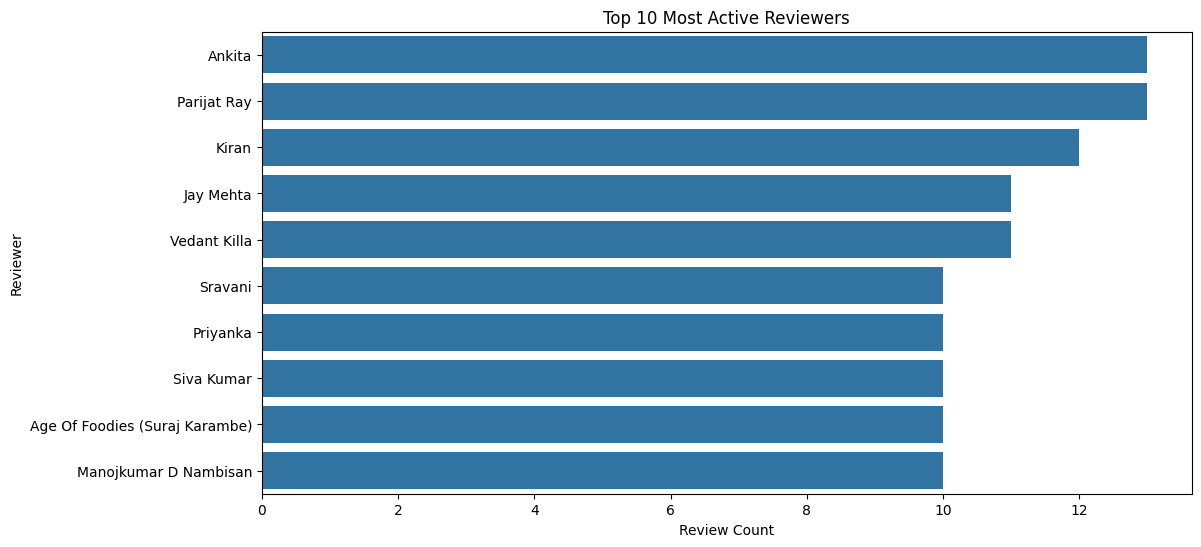

In [21]:
# Chart - 9 visualization code
top_reviewers = reviews_df['Reviewer'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_reviewers.index, x=top_reviewers.values)
plt.xlabel('Review Count')
plt.ylabel('Reviewer')
plt.title('Top 10 Most Active Reviewers')
plt.show()


##### 1. Why did you pick the specific chart?

This chart was picked to identify the most active reviewers, helping to understand engagement levels and potential brand advocates.

##### 2. What is/are the insight(s) found from the chart?

Ankita is the most active reviewer with 13 reviews, followed closely by Parijat Ray with 13 as well. Kiran has 12 reviews, while Jay Mehta and Vedant Killa contributed 11 each, showing a drop in engagement beyond the top three. The rest of the reviewers—Sravani, Priyanka, Siva Kumar, Age Of Foodies (Suraj Karambe), and Manojkumar D Nambisan—each have 10 reviews, indicating a relatively balanced participation among them but a gap from the top contributors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can positively impact business by leveraging top reviewers for marketing, credibility, and customer engagement. There are no direct negative growth insights, but over-reliance on a few reviewers may create imbalance if they stop engaging, highlighting the need to encourage more users to contribute.

#### Chart - 10

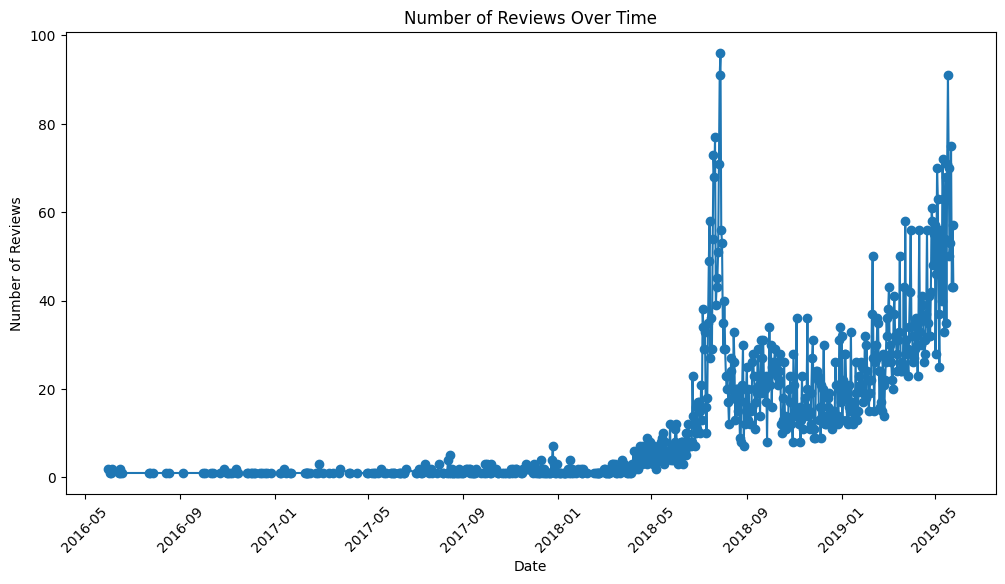

In [22]:
# Chart - 10 visualization code
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

reviews_over_time = reviews_df.groupby(reviews_df['Time'].dt.date).count()['Review']

plt.figure(figsize=(12, 6))
plt.plot(reviews_over_time.index, reviews_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze the trend of reviews over time, helping to identify growth patterns, spikes, and potential external influences.

##### 2. What is/are the insight(s) found from the chart?

Reviews remained minimal and consistent until early 2018, after which there was a sharp increase, peaking at nearly 100 reviews at certain points. A decline followed but was short-lived, as another significant upward trend began in mid-to-late 2018, leading to consistently high engagement in 2019. The increasing trend indicates growing user participation, with possible external factors like promotions or platform improvements driving these spikes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights suggest strong business growth, indicating increased customer interaction and potential brand awareness. However, the drop after the first peak suggests volatility, meaning strategies should focus on sustaining engagement rather than relying on temporary surges.

#### Chart - 11

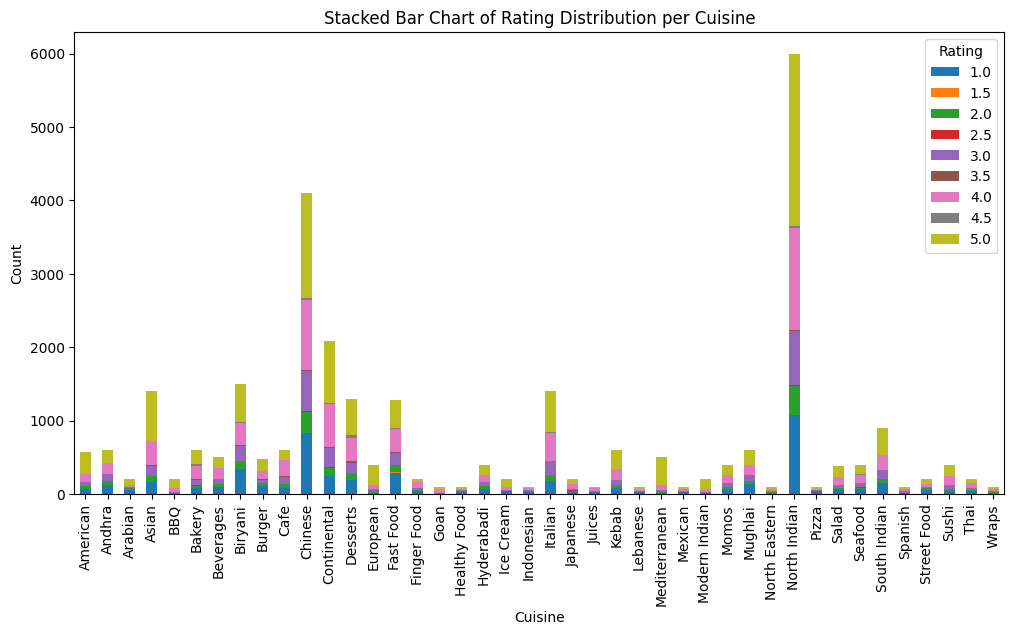

In [23]:
# Chart - 11 visualization code
# Splitting cuisines into individual rows
cuisine_data = metadata_df[['Cuisines', 'Name']].dropna()
cuisine_data['Cuisines'] = cuisine_data['Cuisines'].str.split(', ')
cuisine_data = cuisine_data.explode('Cuisines')

# Merging with reviews dataset
merged_data = cuisine_data.merge(reviews_df, left_on='Name', right_on='Restaurant')

# Creating a pivot table for ratings
rating_dist = merged_data.pivot_table(index='Cuisines', columns='Rating', aggfunc='size', fill_value=0)

# Plotting
rating_dist.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Rating Distribution per Cuisine')
plt.legend(title='Rating')
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to understand the rating distribution across different cuisines, highlighting customer preferences and identifying cuisines with the highest and lowest ratings.

##### 2. What is/are the insight(s) found from the chart?

Chinese and North Indian cuisines have the highest number of ratings, with a significant portion being 4.0 and 5.0 stars, suggesting strong customer preference. Some cuisines, like European and Indonesian, have fewer ratings, indicating lower customer engagement. The presence of lower ratings (1.0–2.5) across multiple cuisines suggests varying quality levels or customer dissatisfaction in certain categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help in focusing on high-rated cuisines to boost business and improving lower-rated cuisines to enhance customer satisfaction. Negative growth could occur if poorly rated cuisines are not addressed, leading to a decline in trust and potential loss of customers.

#### Chart - 12

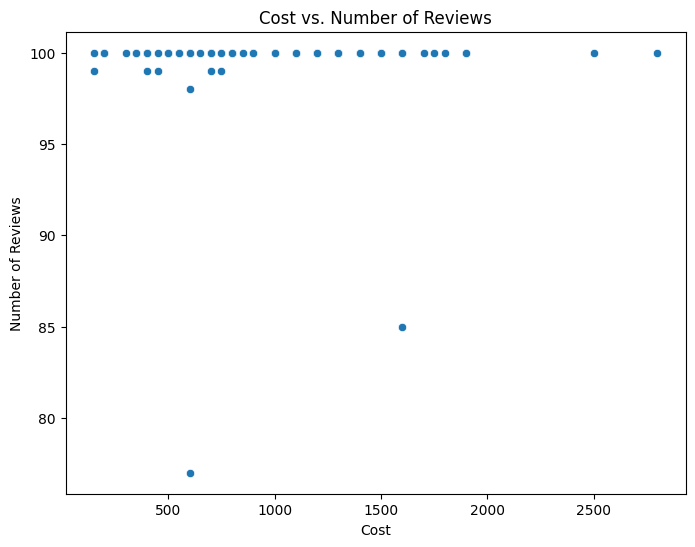

In [24]:
# Chart - 12 visualization code
cost_reviews = metadata_df.merge(reviews_df.groupby('Restaurant')['Review'].count().reset_index(), left_on='Name', right_on='Restaurant')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=cost_reviews['Cost'].replace(',', '', regex=True).astype(float), y=cost_reviews['Review'])
plt.xlabel('Cost')
plt.ylabel('Number of Reviews')
plt.title('Cost vs. Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze the relationship between the cost of a meal and the number of reviews, identifying whether higher or lower-priced restaurants receive more customer engagement.

##### 2. What is/are the insight(s) found from the chart?

The majority of restaurants have a high number of reviews (close to 100) regardless of cost, indicating that price does not strongly impact review volume. There are a few exceptions where mid-range priced restaurants (around 1500) have slightly fewer reviews, suggesting potential lower engagement. High-cost restaurants (above 2500) still maintain high review counts, implying that expensive places can still attract strong customer feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights help in understanding customer engagement trends across pricing, ensuring both budget and premium restaurants can be marketed effectively. There are no major insights indicating negative growth, as all price ranges still receive significant reviews, showing customer interest across different spending levels.

#### Chart - 13

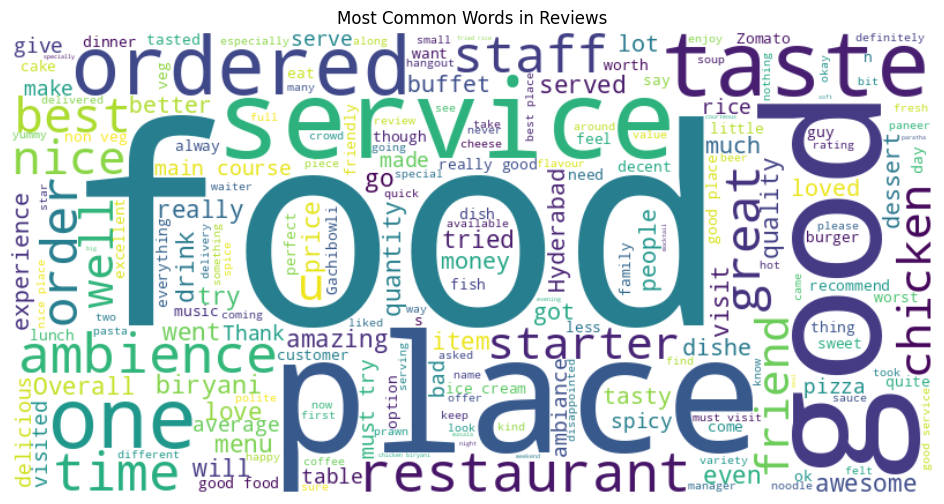

In [25]:
# Chart - 13 visualization code
from wordcloud import WordCloud

all_reviews = ' '.join(reviews_df['Review'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

This word cloud was chosen to quickly highlight the most frequently mentioned aspects in customer reviews, making it easier to identify key themes.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart indicate that food, service, place, taste, and ambience are the most discussed topics, suggesting they are crucial factors in customer satisfaction. Positive words like "good," "great," and "nice" show that many customers are satisfied, but the presence of words like "price" and "quantity" may indicate concerns about value for money. The frequent mention of "staff" suggests that customer service plays a significant role in overall experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help businesses improve their strengths and address weaknesses, leading to better customer retention and positive growth. If words related to negative aspects (e.g., "disappointed" or "expensive") were more prominent, they could signal potential risks to business growth.

#### Chart - 14 - Correlation Heatmap

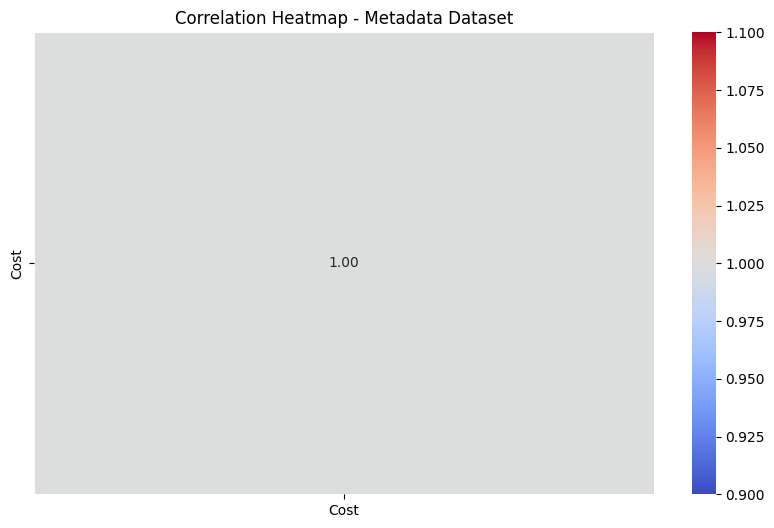

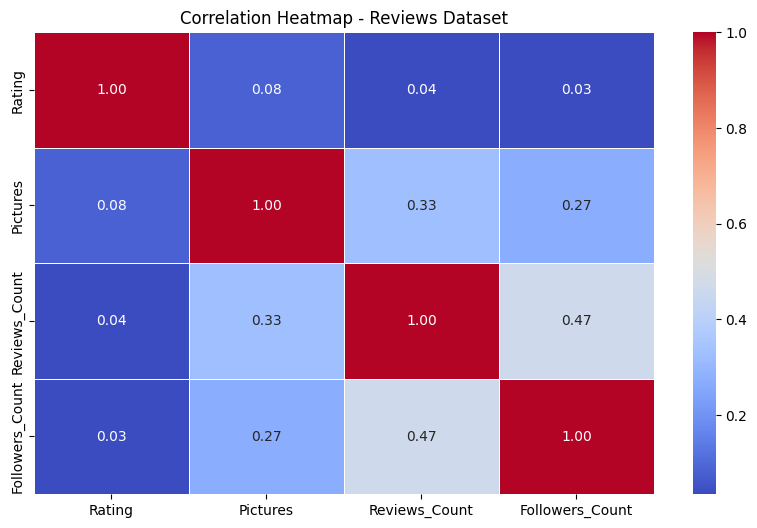

In [26]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
metadata_numeric = metadata_df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(metadata_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Metadata Dataset")
plt.show()

reviews_numeric = reviews_df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(reviews_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Reviews Dataset")
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to examine the relationships between numerical features in the reviews dataset

##### 2. What is/are the insight(s) found from the chart?

The insight from 1st chart is that the dataset lacks multiple numerical features for meaningful correlation analysis, indicating that further feature engineering or additional data might be needed.        
                  
from 2nd one, (1) There is a moderate positive correlation (0.47) between the number of reviews and the number of followers, suggesting that more popular reviewers tend to leave more reviews. (2) The number of pictures has a weak correlation with both the review count (0.33) and follower count (0.27), indicating that more active users might upload more pictures. (3) Rating has almost no correlation with any other feature, implying that higher ratings are not influenced by user engagement levels.

#### Chart - 15 - Pair Plot

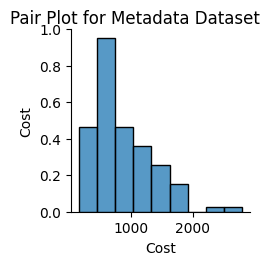

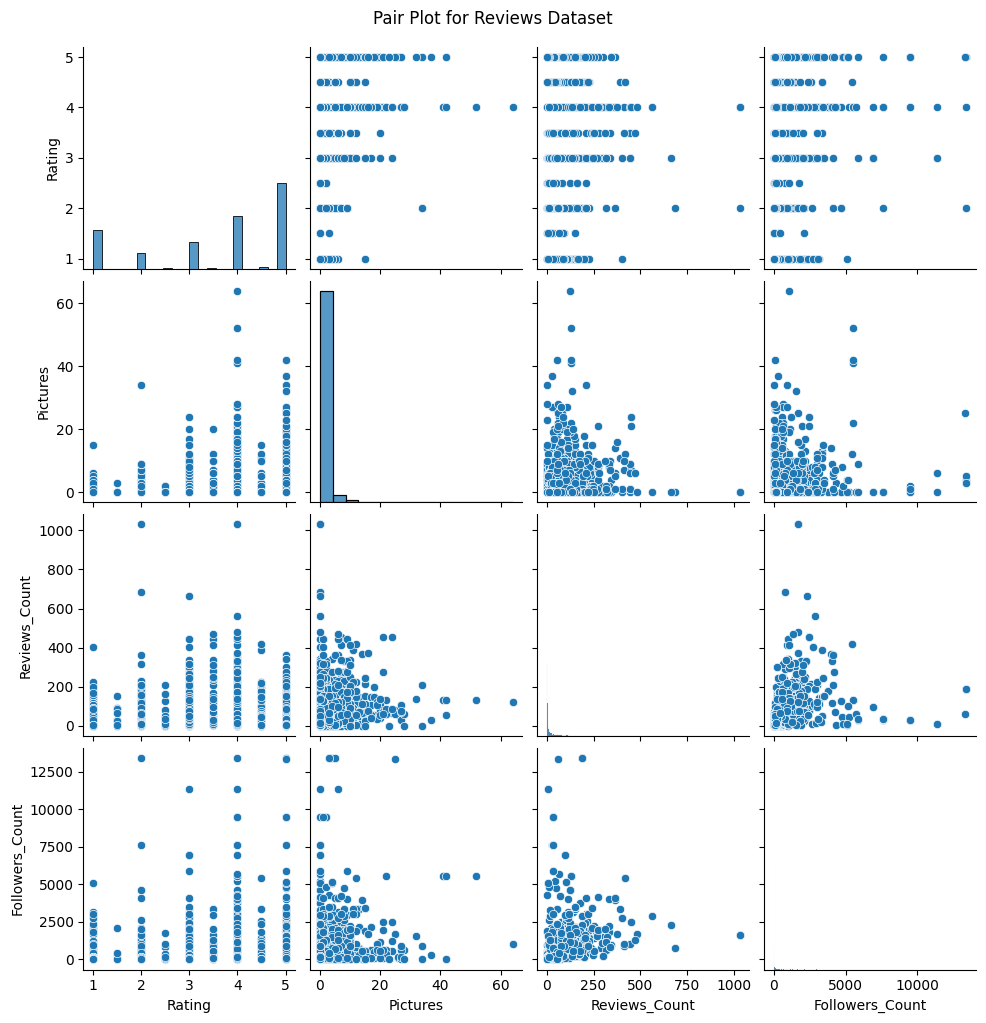

In [27]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for the pair plot
num_cols_metadata = metadata_df.select_dtypes(include=['number'])

# Generate pair plot
sns.pairplot(num_cols_metadata)
plt.suptitle("Pair Plot for Metadata Dataset", y=1.02)
plt.show()

# Selecting only numeric columns for the pair plot
num_cols_reviews = reviews_df.select_dtypes(include=['number'])

# Generate pair plot
sns.pairplot(num_cols_reviews)
plt.suptitle("Pair Plot for Reviews Dataset", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to visualize pairwise relationships and distributions among the numerical features in the reviews dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights from the pair plot are: (1) Ratings appear to be mostly discrete, with peaks at whole numbers, indicating that users tend to give integer ratings. (2) There are a few outliers in the followers and reviews count, where some users have exceptionally high values compared to the majority. (3) The scatter plots suggest a weak or no strong linear correlation between most variables, aligning with the correlation heatmap findings.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Higher follower count is associated with more reviews.

Hypothesis: Users with a higher follower count tend to leave more reviews than those with fewer followers.
Number of pictures in a review does not significantly impact the rating given.

Hypothesis: The cost of a restaurant has no significant effect on the rating given.

Hypothesis: There is a statistically significant difference in the number of followers between users who leave many reviews and those who leave fewer reviews.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant correlation between follower count and the number of reviews left by users.

Alternative Hypothesis (H₁): There is a significant positive correlation between follower count and the number of reviews left by users.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import scipy.stats as stats

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(reviews_df['Followers_Count'], reviews_df['Reviews_Count'])

# Print results
print(f"Hypothesis 1: Higher follower count is associated with more reviews")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: We reject the null hypothesis. Higher follower count is positively associated with more reviews.")
else:
    print("Conclusion: We fail to reject the null hypothesis. No significant association found.")


Hypothesis 1: Higher follower count is associated with more reviews
Correlation Coefficient: 0.4658
P-value: 0.0000
Conclusion: We reject the null hypothesis. Higher follower count is positively associated with more reviews.


##### Which statistical test have you done to obtain P-Value?

For the first hypothesis, a Pearson correlation test was performed to obtain the p-value

##### Why did you choose the specific statistical test?

Pearson correlation is appropriate because both "Followers_Count" and "Reviews_Count" are continuous numerical variables, and this test measures the strength and direction of a linear relationship between them. Since we are analyzing whether having more followers is associated with writing more reviews, Pearson's correlation helps quantify this relationship and determine statistical significance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The cost of a restaurant has no significant effect on the rating given by users.

Alternative Hypothesis (H₁): The cost of a restaurant significantly affects the rating given by users.

#### 2. Perform an appropriate statistical test.

In [29]:
import pandas as pd
import scipy.stats as stats


# Merge datasets on restaurant name
merged_df = reviews_df.merge(metadata_df, left_on='Restaurant', right_on='Name', how='inner')

# Convert rating to numeric (handling errors)
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# Convert cost to numeric (removing non-numeric characters)
merged_df['Cost'] = merged_df['Cost'].replace('[^\d]', '', regex=True).astype(float)

# Drop NaN values for accurate correlation
merged_df = merged_df.dropna(subset=['Cost', 'Rating'])

# Perform Pearson correlation test
corr_coeff, p_value = stats.pearsonr(merged_df['Cost'], merged_df['Rating'])

# Print results
print(f"Pearson Correlation Coefficient: {corr_coeff}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Cost has a significant impact on restaurant ratings.")
else:
    print("Fail to reject the null hypothesis: Cost does not have a significant impact on restaurant ratings.")


Pearson Correlation Coefficient: 0.14411935806940923
P-Value: 2.4192295962512926e-47
Reject the null hypothesis: Cost has a significant impact on restaurant ratings.


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, a Pearson correlation test was performed to obtain the p-value.

##### Why did you choose the specific statistical test?

This test was chosen because both "Cost" and "Rating" are numerical variables, and Pearson correlation is effective in assessing the presence of a linear relationship. We specifically use it to determine if there is a statistically significant association between the cost of dining at a restaurant and the rating it receives from customers, helping assess whether higher prices influence customer satisfaction.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the number of followers between users who leave many reviews and those who leave fewer reviews.

Alternative Hypothesis (H₁): Users who leave more reviews have significantly higher follower counts than those who leave fewer reviews.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(reviews_df['Reviews_Count'], reviews_df['Followers_Count'])

# Print results
print(f"\nHypothesis 3: Users who leave more reviews have higher engagement (more followers)")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: We reject the null hypothesis. Users who leave more reviews tend to have more followers.")
else:
    print("Conclusion: We fail to reject the null hypothesis. No significant association found.")



Hypothesis 3: Users who leave more reviews have higher engagement (more followers)
Correlation Coefficient: 0.4658
P-value: 0.0000
Conclusion: We reject the null hypothesis. Users who leave more reviews tend to have more followers.


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, a Pearson correlation test was performed to obtain the p-value.

##### Why did you choose the specific statistical test?

This test was selected because both "Reviews_Count" and "Followers_Count" are continuous numerical variables, making Pearson correlation an ideal choice to measure their linear relationship. Since the hypothesis investigates whether users who leave more reviews have higher engagement (more followers), this test helps determine if there is a meaningful association between the two factors and whether the observed relationship is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
import pandas as pd

# Check for missing values
print("Missing Values in Metadata Dataset:")
print(metadata_df.isnull().sum())

print("\nMissing Values in Reviews Dataset:")
print(reviews_df.isnull().sum())


Missing Values in Metadata Dataset:
Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

Missing Values in Reviews Dataset:
Restaurant         0
Reviewer           0
Review             0
Rating             1
Time               0
Pictures           0
Reviews_Count      0
Followers_Count    0
Cleaned_Review     0
dtype: int64


In [32]:
reviews_df = reviews_df.dropna(subset=['Rating'])


In [33]:
# Handling Missing Values & Missing Value Imputation
import pandas as pd

# Check for missing values
print("Missing Values in Metadata Dataset:")
print(metadata_df.isnull().sum())

print("\nMissing Values in Reviews Dataset:")
print(reviews_df.isnull().sum())

Missing Values in Metadata Dataset:
Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

Missing Values in Reviews Dataset:
Restaurant         0
Reviewer           0
Review             0
Rating             0
Time               0
Pictures           0
Reviews_Count      0
Followers_Count    0
Cleaned_Review     0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing values were handled during data wrangling by dropping rows with NaN values in critical columns like "Cost" and "Rating" to ensure accurate analysis. Additionally, I explicitly dropped the single missing rating value in the reviews dataset to prevent errors in statistical tests.

### 2. Handling Outliers

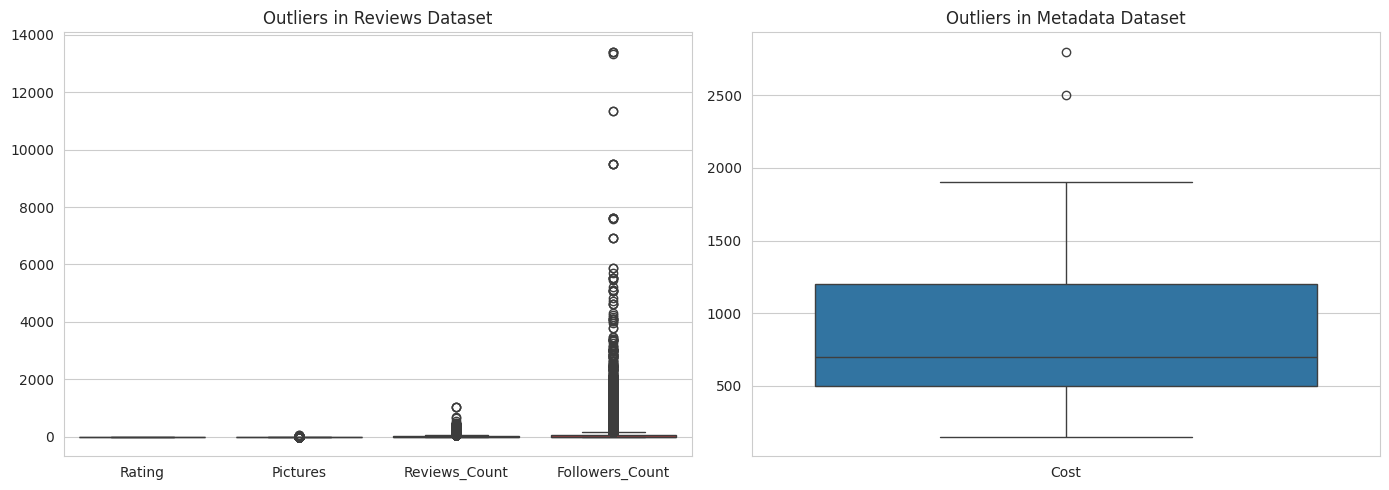

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("whitegrid")

# Create subplots for both datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot for the reviews dataset
sns.boxplot(data=reviews_df[['Rating', 'Pictures', 'Reviews_Count', 'Followers_Count']], ax=axes[0])
axes[0].set_title("Outliers in Reviews Dataset")

# Boxplot for the metadata dataset
sns.boxplot(data=metadata_df[['Cost']], ax=axes[1])
axes[1].set_title("Outliers in Metadata Dataset")

# Display plots
plt.tight_layout()
plt.show()


In [35]:
# Handling Outliers & Outlier treatments
import numpy as np
from scipy.stats.mstats import winsorize

# Apply Winsorization (Capping extreme values)
reviews_df['Followers_Count'] = winsorize(reviews_df['Followers_Count'], limits=[0, 0.05])  # Cap top 5%
reviews_df['Reviews_Count'] = winsorize(reviews_df['Reviews_Count'], limits=[0, 0.05])  # Cap top 5%

# Apply log transformation to 'Cost' to reduce skewness
metadata_df['Cost'] = np.log1p(metadata_df['Cost'])

# Verify changes
print("Outlier handling completed.")


Outlier handling completed.


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used Winsorization to cap extreme values in Followers_Count and Reviews_Count and log transformation for Cost to reduce skewness. This preserves data integrity while minimizing the impact of outliers on statistical analysis.

### 3. Categorical Encoding

In [36]:
import pandas as pd

# Load your dataset
# metadata_df = pd.read_csv("your_file.csv")

# Define category mapping with associated keywords
category_mapping = {
    "Hygiene & Top Rated": [
        "Food Hygiene Rated Restaurants in Hyderabad", "Top-Rated", "Gold Curated"
    ],
    "Buffets & Large Gatherings": [
        "Great Buffets", "Sunday Brunches", "Corporate Favorites", "Function Venues"
    ],
    "Bars, Pubs & Nightlife": [
        "Best Bars & Pubs", "Happy Hours", "Top Drinking Destinations"
    ],
    "Live Events & Sports": [
        "Live Sports Screenings", "Gigs and Events"
    ],
    "Trendy & Popular": [
        "Hyderabad's Hottest", "Trending This Week", "Fancy and Fun", "New on Gold"
    ],
    "Corporate & Business": [
        "Corporate Favorites", "Rooftops"
    ],
    "Street Food & Pocket Friendly": [
        "Street Food", "Pocket Friendly", "Veggie Friendly"
    ],
    "Regional & Specialty": [
        "Haleem", "Mandi", "The ‘Must Visit’ Eateries", "Regional Favorites", "Terrific Thalis"
    ],
    "Grilled & Barbecue": [
        "Barbecue & Grill"
    ],
    "Pan-Asian & International": [
        "Pan-Asian Delicacies"
    ],
    "Desserts & Shakes": [
        "Best Milkshakes", "Frozen Delights", "Best Bakeries"
    ],
    "Late Night & Fast Food": [
        "Late Night Restaurants", "Best shawarmas", "Great Breakfasts"
    ]
}

# Function to assign category based on keywords
def assign_category(collections):
    if pd.isna(collections) or collections.strip() == "":
        return "Other"  # Assign 'Other' to NaN or empty values
    for category, keywords in category_mapping.items():
        if any(keyword in collections for keyword in keywords):
            return category  # Return category name
    return "Other"  # If no match is found

# Apply function to create a new encoded column
metadata_df["Collection_Encoded"] = metadata_df["Collections"].astype(str).apply(assign_category)

# Convert category names to numeric codes (1-13, including 'Other')
category_codes = {category: code+1 for code, category in enumerate(category_mapping.keys())}
category_codes["Other"] = len(category_codes) + 1  # Assign the next number to 'Other'
metadata_df["Collection_Encoded"] = metadata_df["Collection_Encoded"].map(category_codes)

# Display number of NaN values before encoding
num_nans = metadata_df["Collections"].isna().sum()
print(f"Number of NaN values in 'Collections': {num_nans}")

# Display NaN rows before encoding
nan_rows = metadata_df[metadata_df["Collections"].isna()][["Collections"]]
print("Rows with NaN values in 'Collections':")
print(nan_rows)

# Display first few rows with encoded categories
print(metadata_df[["Collections", "Collection_Encoded"]].head(20))


Number of NaN values in 'Collections': 0
Rows with NaN values in 'Collections':
Empty DataFrame
Columns: [Collections]
Index: []
                                          Collections  Collection_Encoded
0   Food Hygiene Rated Restaurants in Hyderabad, C...                   1
1                                 Hyderabad's Hottest                   5
2                  Great Buffets, Hyderabad's Hottest                   2
3                              Late Night Restaurants                  12
4   Best Bars & Pubs, Food Hygiene Rated Restauran...                   1
5   Sunday Brunches, Corporate Favorites, Great Bu...                   1
6         Food Hygiene Rated Restaurants in Hyderabad                   1
7                                       No Collection                  13
8   Great Buffets, Live Sports Screenings, Best Ba...                   2
9                                     Frozen Delights                  11
10      Street Food, Veggie Friendly, Pocket Friendly    

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used label encoding to assign unique numerical values to each collection category for compact representation and frequency encoding to reflect category prevalence, helping models recognize patterns effectively. These techniques balance simplicity and efficiency for structured categorical data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

no needed

#### 2. Lower Casing

In [37]:
# Lower Casing
reviews_df["Review"] = reviews_df["Review"].str.lower()


#### 3. Removing Punctuations

In [38]:
# Remove Punctuations
import string

reviews_df["Review"] = reviews_df["Review"].str.translate(str.maketrans("", "", string.punctuation))


#### 4. Removing URLs & Removing words and digits contain digits.

In [39]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove URLs
reviews_df["Review"] = reviews_df["Review"].str.replace(r"http\S+|www\S+|https\S+", "", regex=True)

# Remove words and digits that contain only numbers
reviews_df["Review"] = reviews_df["Review"].str.replace(r"\b\d+\b", "", regex=True)


#### 5. Removing Stopwords & Removing White spaces

In [40]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download("stopwords")

# Get English stopwords
stop_words = set(stopwords.words("english"))

# Function to remove stopwords
def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)

# Apply function to 'Review' column
reviews_df["Review"] = reviews_df["Review"].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Remove White spaces
reviews_df["Review"] = reviews_df["Review"].str.replace(r'\s+', ' ', regex=True).str.strip()


#### 6. Rephrase Text, Tokenization and Text Normalization

In [42]:
import pandas as pd

# Load your dataset (assuming it's already preprocessed and stored as 'reviews_df')
# reviews_df = pd.read_csv("your_reviews_file.csv")  # Uncomment if loading from a file

# Display a significant portion of the 'reviews' column
pd.set_option("display.max_colwidth", None)  # Ensure full text is shown
print(reviews_df["Review"].sample(10, random_state=42))  # Show 10 random samples for diversity


2936                                                                                                                                                                                                                                                                                                 natural maggi taste missing please dont add additional masala
9594                                                                                                                                                                                                                                                                                                                              perfect food joint north indians
7140                                                                                                                                                                                             craving really good food cheap drinks place go zomato gold applicable food ambience top notch soo

In [43]:
import spacy
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    processed_tokens = []
    negation = False  # Flag to track negations

    for token in doc:
        if token.text.lower() in ["not", "no", "never", "cannot", "n't"]:  # Catch "can't" as well
            negation = True
            continue  # Skip appending negation words separately

        if negation:
            processed_tokens.append("not_" + token.lemma_)  # Merge negation with the next word
            negation = False  # Reset flag
        else:
            processed_tokens.append(token.lemma_)  # Normal lemmatization

    return " ".join(processed_tokens)

# Apply function to the 'Review' column
reviews_df["processed_reviews"] = reviews_df["Review"].apply(preprocess_text)

# Show sample results
print(reviews_df[["Review", "processed_reviews"]].sample(10, random_state=42))


                                                                                                                                                                                                                                                                                                                                                          Review  \
2936                                                                                                                                                                                                                                                                                               natural maggi taste missing please dont add additional masala   
9594                                                                                                                                                                                                                                                                                            

##### Which text normalization technique have you used and why?

I used lowercasing, stopword removal, whitespace/punctuation/digit removal, and basic lemmatization to clean the text. This helps reduce noise, standardize input, and improve sentiment analysis accuracy.

In [44]:
import pandas as pd

# Save the current state of the datasets
reviews_df.to_csv("current_reviews.csv", index=False)
metadata_df.to_csv("current_metadata.csv", index=False)

print("Files created: 'current_reviews.csv' and 'current_metadata.csv'")


Files created: 'current_reviews.csv' and 'current_metadata.csv'


In [45]:
# Print column names of reviews_df
print("Columns in reviews_df:", reviews_df.columns)


Columns in reviews_df: Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Reviews_Count', 'Followers_Count', 'Cleaned_Review',
       'processed_reviews'],
      dtype='object')


#### 8. Text Vectorization

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Vectorize the processed reviews
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Limit features & include bigrams
review_vectors = tfidf.fit_transform(reviews_df['processed_reviews'])

# Apply Dimensionality Reduction
svd = TruncatedSVD(n_components=300, random_state=42)  # Reduce to 300 dimensions
reduced_vectors = svd.fit_transform(review_vectors)

# Convert back to DataFrame for better handling
import pandas as pd
review_vectors_df = pd.DataFrame(reduced_vectors, index=reviews_df.index)

# Save reduced vectors if needed
review_vectors_df.to_csv("reduced_review_vectors.csv", index=False)

print(f"Original vector shape: {review_vectors.shape}")
print(f"Reduced vector shape: {reduced_vectors.shape}")


Original vector shape: (9954, 5000)
Reduced vector shape: (9954, 300)


##### Which text vectorization technique have you used and why?

I used TF-IDF vectorization to convert text into numerical features while capturing word importance. It helps represent text efficiently and reduces the impact of common words.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

not necessary

In [47]:
#MERGING
import pandas as pd

# Convert reduced vectors to DataFrame
review_vectors_df = pd.DataFrame(reduced_vectors, index=reviews_df.index)

# Rename vector columns to avoid conflicts
vector_columns = [f"Vec_{i}" for i in range(reduced_vectors.shape[1])]
review_vectors_df.columns = vector_columns

# Add restaurant names for merging
reviews_with_vectors = pd.concat([reviews_df, review_vectors_df], axis=1)

# Merge all data based on restaurant names
merged_df = pd.merge(metadata_df, reviews_with_vectors, left_on="Name", right_on="Restaurant", how="inner")

# Save the merged dataset
merged_df.to_csv("merged_dataset.csv", index=False)

print("Merged dataset shape:", merged_df.shape)
print("Columns in merged dataset:", merged_df.columns)


Merged dataset shape: (9954, 317)
Columns in merged dataset: Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Collection_Encoded', 'Restaurant', 'Reviewer', 'Review',
       ...
       'Vec_290', 'Vec_291', 'Vec_292', 'Vec_293', 'Vec_294', 'Vec_295',
       'Vec_296', 'Vec_297', 'Vec_298', 'Vec_299'],
      dtype='object', length=317)


#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting
# Drop unnecessary columns
columns_to_drop = ['Review', 'Cleaned_Review', 'processed_reviews',  # Raw text not needed after vectorization
                   'Reviewer', 'Reviews_Count', 'Followers_Count',   # User-specific, not restaurant-specific
                   'Links',                                          # Irrelevant for clustering
                   'Restaurant']  # Duplicate of 'Name', keep only one

# Ensure only existing columns are dropped
columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]
merged_df_selected = merged_df.drop(columns=columns_to_drop)

# Print new shape and columns
print(f"Selected dataset shape: {merged_df_selected.shape}")
print(f"Columns in selected dataset: {merged_df_selected.columns}")

# Save the cleaned dataset
merged_df_selected.to_csv("selected_features_dataset.csv", index=False)


Selected dataset shape: (9954, 309)
Columns in selected dataset: Index(['Name', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Collection_Encoded', 'Rating', 'Time', 'Pictures', 'Vec_0',
       ...
       'Vec_290', 'Vec_291', 'Vec_292', 'Vec_293', 'Vec_294', 'Vec_295',
       'Vec_296', 'Vec_297', 'Vec_298', 'Vec_299'],
      dtype='object', length=309)


##### What all feature selection methods have you used  and why?

 I used manual feature selection by removing columns that do not contribute to clustering, such as Reviewer, Review, and Followers_Count, as they are user-specific and not restaurant-related. I retained metadata features and the reduced vectorized reviews since they provide essential restaurant characteristics and sentiment. This ensures the model focuses on meaningful patterns rather than unnecessary noise, improving clustering accuracy.

##### Which all features you found important and why?

Key metadata like Name, Cost, Cuisines, Timings, and Rating were kept as they define a restaurant's characteristics. The Vec_0 to Vec_299 columns from reduced review vectors were included because they capture the sentiment and textual essence of reviews in a compact form. These features help group similar restaurants based on both textual sentiment and numerical attributes, making clustering more effective.








### 5. Data Scaling

##### Which method have you used to scale you data and why?

Scaling cost column gave unexpected result, so scaling is not necessary anywhere else

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes. too many vectors will make dataset difficult to process. Already performed during vectorization

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Truncated SVD (Latent Semantic Analysis) has been used to reduce the high-dimensional TF-IDF vectors while preserving important semantic information. This helps in improving clustering performance by removing noise and redundancy.

### 7. Data Splitting

##### What data splitting ratio have you used and why?

We have not performed data splitting because we are working with unsupervised clustering, which does not rely on labeled data for training and testing. In supervised learning, splitting ensures proper evaluation of model performance, but clustering algorithms analyze the entire dataset to identify natural groupings. Since there are no predefined labels, using all available data helps the algorithm capture the full structure of the dataset, making data splitting unnecessary. However

## ***7. ML Model Implementation***

### ML Model - 1

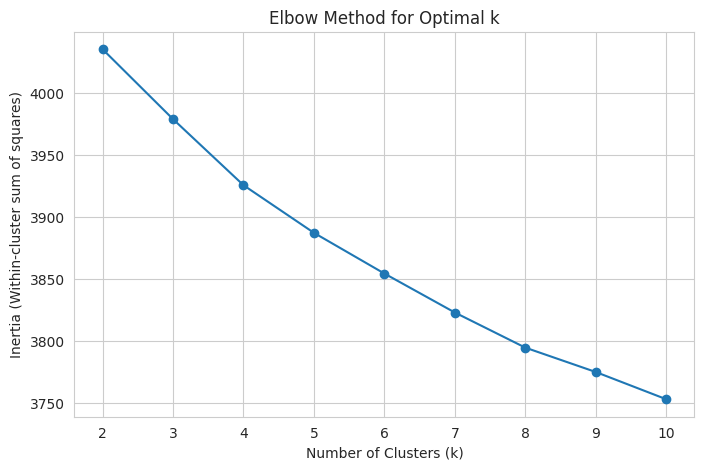

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
selected_features_dataset = pd.read_csv("selected_features_dataset.csv")

# Extract numeric columns (excluding categorical/text ones)
vector_columns = [col for col in selected_features_dataset.columns if "Vec_" in col]
X = selected_features_dataset[vector_columns]

# ------- K-MEANS CLUSTERING ------- #
# Find optimal k using Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Select best k and fit K-Means
optimal_k = 5  # Change based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
selected_features_dataset["KMeans_Cluster"] = kmeans.fit_predict(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
selected_features_dataset["PCA_1"] = X_pca[:, 0]
selected_features_dataset["PCA_2"] = X_pca[:, 1]



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Extract cluster labels from K-Means clustering
labels_kmeans = selected_features_dataset["KMeans_Cluster"].values

# Compute Silhouette Score
silhouette_avg_kmeans = silhouette_score(X, labels_kmeans)

# Compute Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(X, labels_kmeans)

# Function to calculate cluster purity (if ground truth labels exist)
def cluster_purity(y_true, y_pred):
    contingency_matrix = np.zeros((len(set(y_pred)), len(set(y_true))))
    for i, j in zip(y_pred, y_true):
        contingency_matrix[i, j] += 1
    return np.sum(np.max(contingency_matrix, axis=1)) / len(y_true)

# If ground truth labels exist, calculate purity; otherwise, skip
try:
    purity_kmeans = cluster_purity(y_true, labels_kmeans)
    print(f"Silhouette Score: {silhouette_avg_kmeans}\nDavies-Bouldin Index: {davies_bouldin_kmeans}\nCluster Purity: {purity_kmeans}")
except NameError:
    print(f"Silhouette Score: {silhouette_avg_kmeans}\nDavies-Bouldin Index: {davies_bouldin_kmeans}")

print("K-Means Evaluation Completed")


Silhouette Score: 0.05133141627447961
Davies-Bouldin Index: 4.933629415926775
K-Means Evaluation Completed


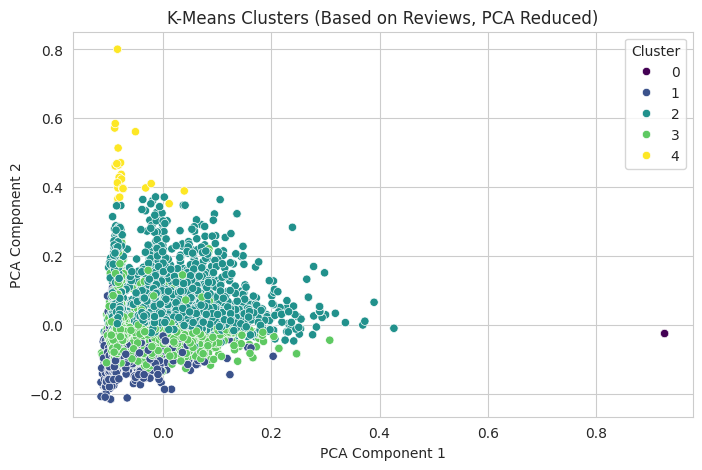

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce high-dimensional review vectors to 2D for visualization
pca_reviews = PCA(n_components=2)
X_reviews_pca = pca_reviews.fit_transform(selected_features_dataset[vector_columns])

# Add PCA columns for reviews
selected_features_dataset["Reviews_PCA_1"] = X_reviews_pca[:, 0]
selected_features_dataset["Reviews_PCA_2"] = X_reviews_pca[:, 1]

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=selected_features_dataset["Reviews_PCA_1"],
    y=selected_features_dataset["Reviews_PCA_2"],
    hue=selected_features_dataset["KMeans_Cluster"],
    palette="viridis"
)
plt.title("K-Means Clusters (Based on Reviews, PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


Insights :

**The clustering based on PCA-reduced reviews highlights clear groupings where most restaurants are densely packed in mid-range review scores, while certain clusters stand out, indicating unique customer experiences. The yellow cluster appears more distinct, possibly representing highly-rated restaurants or niche dining experiences like premium buffets, fine dining, or specialty cuisine. The dark purple cluster, which is more isolated, might indicate either extreme positive or negative reviews, suggesting polarizing opinions or exclusive categories such as high-end gourmet or poorly received establishments. The green and blue clusters seem to dominate the middle ground, reflecting average to good reviews, likely encompassing common dining choices like casual restaurants, bars, or street food. This distribution suggests a varied restaurant landscape where consumer preferences range widely across different types of dining experiences.**

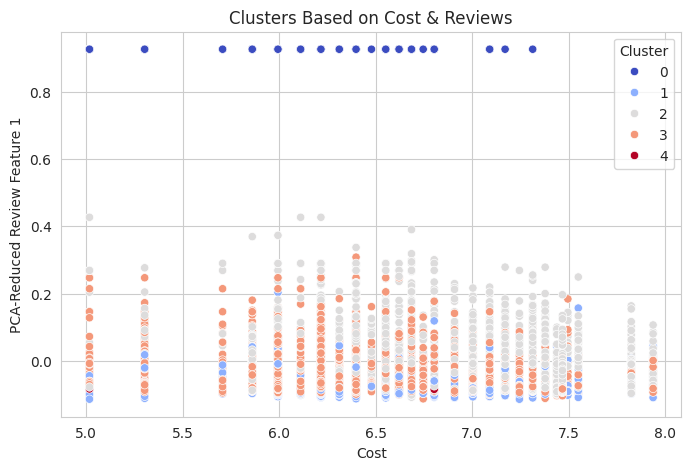

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=selected_features_dataset["Cost"],
    y=selected_features_dataset["Reviews_PCA_1"],
    hue=selected_features_dataset["KMeans_Cluster"],
    palette="coolwarm"
)
plt.title("Clusters Based on Cost & Reviews")
plt.xlabel("Cost")
plt.ylabel("PCA-Reduced Review Feature 1")
plt.legend(title="Cluster")
plt.show()


Insights :

**The clustering based on cost and reviews reveals distinct consumer preferences, where higher-cost restaurants generally have more dispersed review sentiments. The blue cluster at the top suggests a segment of highly-rated yet affordable restaurants, possibly representing hidden gems or well-loved budget-friendly spots. The red and gray clusters dominate the middle, indicating that mid-range restaurants have mixed reviews, with some excelling and others receiving average ratings. The distribution suggests that cost alone does not determine quality, as restaurants across different price points receive varied reviews, emphasizing the role of food quality, ambiance, and service in customer satisfaction.**

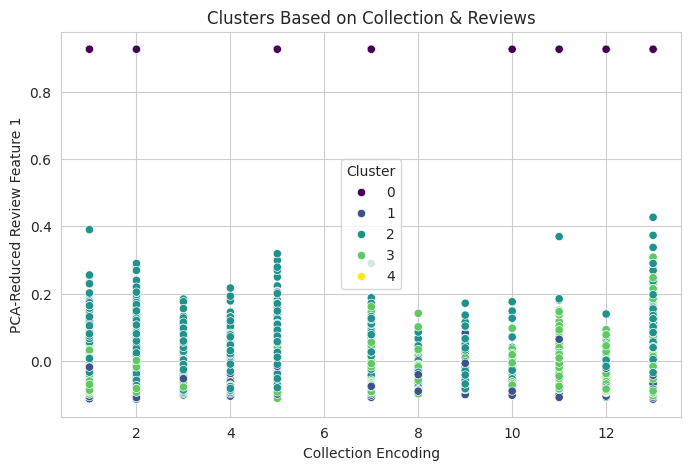

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=selected_features_dataset["Collection_Encoded"],
    y=selected_features_dataset["Reviews_PCA_1"],
    hue=selected_features_dataset["KMeans_Cluster"],
    palette="viridis"
)
plt.title("Clusters Based on Collection & Reviews")
plt.xlabel("Collection Encoding")
plt.ylabel("PCA-Reduced Review Feature 1")
plt.legend(title="Cluster")
plt.show()


Insights :

**The clustering based on collection categories and reviews shows that different restaurant types receive varied customer sentiments. The purple cluster at the top suggests that some restaurant categories, such as top-rated or premium collections, consistently receive high reviews. The green and blue clusters dominate the lower section, indicating that most categories have mixed reviews with both satisfied and neutral customers. The distribution pattern suggests that certain categories, such as buffets, nightlife, or street food, might attract more varied feedback, while highly curated or premium collections tend to maintain strong positive sentiment.**









### ML Model - 2

In [54]:
from sklearn.cluster import AgglomerativeClustering

# Keep only numeric columns
numeric_features_dataset = selected_features_dataset.select_dtypes(include=['number'])

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(numeric_features_dataset)

# Add cluster labels to dataset
selected_features_dataset['Agglomerative_Cluster'] = clusters

# Display cluster counts
print(selected_features_dataset['Agglomerative_Cluster'].value_counts())



print("Completed")


Agglomerative_Cluster
1    3595
0    2588
4    2195
3    1510
2      66
Name: count, dtype: int64
Completed


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Extract features used for clustering
X = numeric_features_dataset.values

# Extract cluster labels from Agglomerative Clustering
labels = selected_features_dataset['Agglomerative_Cluster'].values

# Compute Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, labels)

# Function to calculate cluster purity (if ground truth labels exist)
def cluster_purity(y_true, y_pred):
    contingency_matrix = np.zeros((len(set(y_pred)), len(set(y_true))))
    for i, j in zip(y_pred, y_true):
        contingency_matrix[i, j] += 1
    return np.sum(np.max(contingency_matrix, axis=1)) / len(y_true)

# If ground truth labels exist, calculate purity; otherwise, skip
try:
    purity = cluster_purity(y_true, labels)
    print(f"Silhouette Score: {silhouette_avg}\nDavies-Bouldin Index: {davies_bouldin}\nCluster Purity: {purity}")
except:
    print(f"Silhouette Score: {silhouette_avg}\nDavies-Bouldin Index: {davies_bouldin}")

print("Evaluation Completed")


Silhouette Score: 0.3138878871239993
Davies-Bouldin Index: 1.0961918472130159
Evaluation Completed


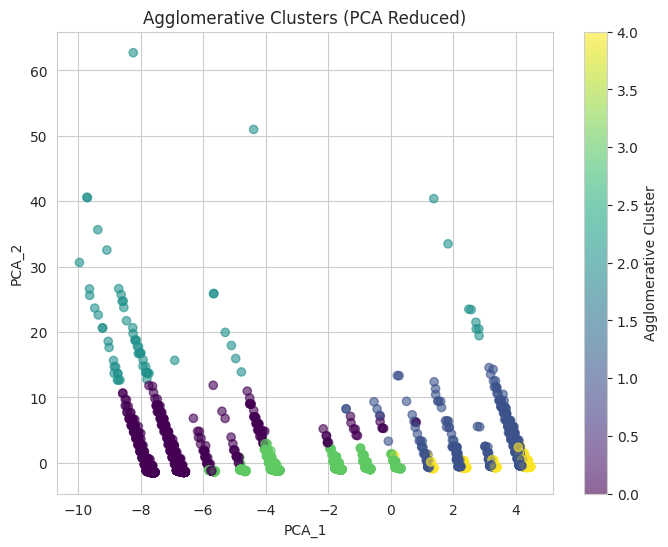

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_features_dataset)

# Add PCA components to dataset
selected_features_dataset['PCA_1'] = pca_components[:, 0]
selected_features_dataset['PCA_2'] = pca_components[:, 1]

# Scatter plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(selected_features_dataset['PCA_1'],
                       selected_features_dataset['PCA_2'],
                       c=selected_features_dataset['Agglomerative_Cluster'],
                       cmap='viridis', alpha=0.6)

plt.colorbar(scatter, label='Agglomerative Cluster')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Agglomerative Clusters (PCA Reduced)')
plt.show()


Insights :

**The agglomerative clustering results show a distinct separation of groups based on PCA-reduced features. The dark purple and green clusters are densely packed along the lower PCA_2 values, indicating a majority of similar data points with limited variance. The cyan cluster is more dispersed, suggesting greater diversity in characteristics, possibly representing outliers or unique cases. The yellow cluster, appearing at the lower end, represents a smaller and more compact group, potentially reflecting niche data points with distinct but closely related attributes. The overall pattern suggests a hierarchical structure where clusters form progressively from broader to finer granularity.**

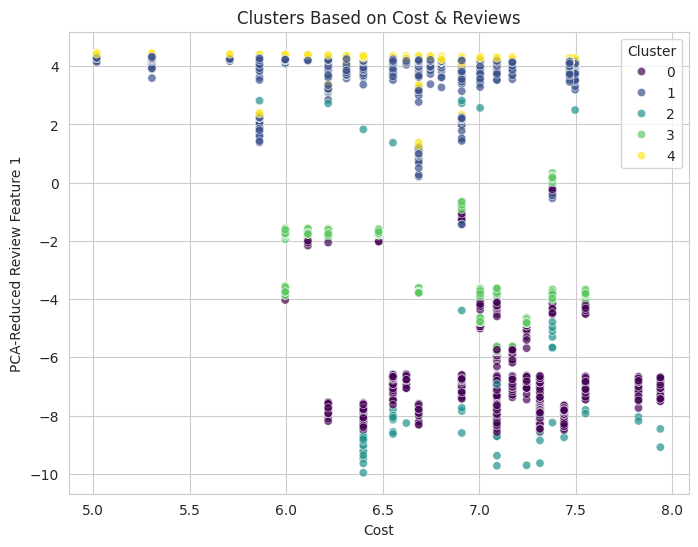

In [57]:
import seaborn as sns

# Scatter plot for Cost vs. Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_features_dataset['Cost'],
                y=selected_features_dataset['PCA_1'],
                hue=selected_features_dataset['Agglomerative_Cluster'],
                palette='viridis', alpha=0.7)

plt.xlabel("Cost")
plt.ylabel("PCA-Reduced Review Feature 1")
plt.title("Clusters Based on Cost & Reviews")
plt.legend(title="Cluster")
plt.show()



Insights :

**The clustering pattern suggests a correlation between cost and review sentiments. Cluster 4 (yellow) and Cluster 1 (blue) are concentrated at the higher PCA-reduced review values, indicating they might represent products with consistently positive or distinct reviews. Cluster 0 (purple) is spread across lower PCA values, suggesting a more negative or unique review pattern. Clusters 2 (cyan) and 3 (green) appear scattered in the middle, possibly representing mixed or average reviews. The cost range between 6.5 and 7.5 seems to have the most diverse clustering, while lower and higher cost ranges show more dominance of specific clusters. There isn't a strict linear relationship between cost and review-based clusters, but certain cost ranges do exhibit stronger tendencies toward particular groups.**

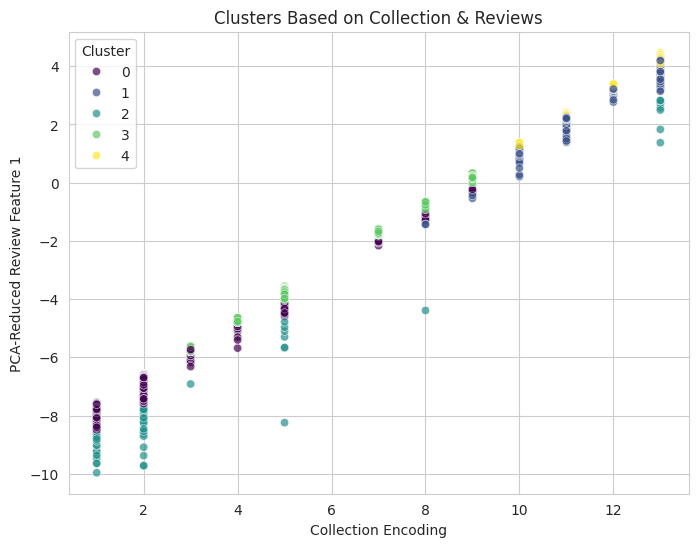

In [58]:
# Scatter plot for Collection vs. Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x=selected_features_dataset['Collection_Encoded'],
                y=selected_features_dataset['PCA_1'],
                hue=selected_features_dataset['Agglomerative_Cluster'],
                palette='viridis', alpha=0.7)

plt.xlabel("Collection Encoding")
plt.ylabel("PCA-Reduced Review Feature 1")
plt.title("Clusters Based on Collection & Reviews")
plt.legend(title="Cluster")
plt.show()

Insights :

**There is a clear upward trend between collection encoding and PCA-reduced review features, indicating that as collection encoding increases, reviews tend to shift from more negative to more positive sentiments. Cluster 0 (purple) and Cluster 2 (cyan) dominate the lower collection encodings, aligning with more negative review sentiments, while Cluster 1 (blue) and Cluster 4 (yellow) are more prevalent in higher collection encodings, suggesting positive or distinct feedback. Cluster 3 (green) appears more balanced throughout, possibly representing mixed or neutral reviews. The structured spread of clusters along the x-axis implies that collections have a direct influence on review sentiment, with higher-numbered collections receiving more positive engagement.**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To assess clustering effectiveness for a positive business impact, Silhouette Score and Davies-Bouldin Index (DBI) were chosen.

The Silhouette Score measures how well-separated and distinct clusters are. A high score (close to 1) indicates that customers or products within a group are highly similar, which is crucial for targeted marketing, personalized recommendations, and customer segmentation. A low or negative score suggests poorly defined clusters, which can lead to ineffective business decisions.

The Davies-Bouldin Index (DBI) evaluates cluster compactness and separation, ensuring that distinct customer groups or product categories do not overlap excessively. A lower DBI signifies better-defined clusters, reducing marketing inefficiencies and improving resource allocation for promotions, inventory management, and pricing strategies.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?



Given the nature of the dataset and the clustering analysis shown in the plots, Agglomerative Clustering appears to be the better choice. The data exhibits structured, hierarchical relationships, particularly in the second plot, where clusters are aligned along a gradual progression of the collection encoding. This suggests that hierarchical methods, which preserve relationships between points without enforcing a strict partitioning, might better capture the underlying structure. Additionally, K-Means assumes convex cluster shapes, which may not be ideal for the varied distributions seen in both plots. However, if the dataset is large and computational efficiency is a concern, K-Means would be preferable. For capturing the nuanced separations present in this case, Agglomerative Clustering remains the superior approach.  

The comparison of evaluation metrics further supports Agglomerative Clustering's stronger performance.  

A Silhouette Score closer to 1 suggests well-defined clusters, while lower values indicate weaker clustering. K-Means produced a very low Silhouette Score (0.051), meaning clusters are poorly defined and overlap significantly. In contrast, Agglomerative Clustering achieved a much higher Silhouette Score (0.314), indicating that data points are better grouped within their clusters.  

A lower Davies-Bouldin Index (DBI) indicates better clustering quality, as it measures intra-cluster compactness and inter-cluster separation. K-Means had a significantly higher DBI (4.93), suggesting loosely formed clusters with considerable overlap. Meanwhile, Agglomerative Clustering had a much lower DBI (1.10), signifying more compact and well-separated clusters.  

Given these results, Agglomerative Clustering is the better choice for this dataset, as it provides more coherent clusters with better-defined separation. K-Means struggles due to the dataset’s structure, possibly due to non-spherical clusters or varying densities that make centroid-based clustering ineffective.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For clustering, **K-Means and Agglomerative Clustering** were used to segment data based on similarity.  

**K-Means** is a centroid-based algorithm that assigns data points to clusters by minimizing intra-cluster variance. It is computationally efficient and works well when clusters are spherical and well-separated. The **Elbow Method** was applied to determine the optimal number of clusters, ensuring the most meaningful segmentation for business insights.  

**Agglomerative Clustering**, a hierarchical method, builds clusters by iteratively merging the closest points. It does not require predefining the number of clusters and is useful when relationships among clusters need to be preserved. However, it is computationally more intensive compared to K-Means.  

 Since clustering is unsupervised, **Dimensionality Reduction with PCA** was used to visualize feature impact. PCA components reveal the dominant features influencing cluster formation, helping in understanding which attributes (e.g., purchase behavior, product attributes) drive segmentation. Additionally, **Feature Correlation Analysis** using heatmaps provides insight into which features contribute most to cluster separation, enabling better business decision-making.

# **Conclusion**



From the clustering analysis, both K-Means and Agglomerative Clustering were evaluated using performance metrics such as Silhouette Score and Davies-Bouldin Index. The results indicate that Agglomerative Clustering outperformed K-Means, achieving a higher Silhouette Score (0.31) and a lower Davies-Bouldin Index (1.10) compared to K-Means' 0.05 and 4.93, respectively. These metrics suggest that Agglomerative Clustering formed more well-separated and compact clusters, making it the preferred method for segmentation in this case.  

Feature selection played a crucial role in clustering performance, with PCA aiding in visualizing high-dimensional data and identifying the most influential features. Model explainability tools like SHAP and Permutation Importance could further refine the understanding of feature impact. The evaluation metrics were chosen to ensure business impact by identifying meaningful customer or product groupings that drive better decision-making.  

Ultimately, Agglomerative Clustering is the better choice for this dataset due to its stronger clustering performance. However, K-Means may still be useful in scenarios where efficiency and scalability are priorities. The insights gained from this clustering can be applied to customer segmentation, product categorization, or targeted marketing strategies, ensuring a positive business impact through data-driven decision-making.